Shaan Sekhon

3032760265

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Step 1: Calculate the atmospheric density profile

**1.**

In [2]:
def get_p(r, m_u__over_m_p):
    
    """ The input paramter r is kilomteres above the earth 
        and m_u/ m_p (which describes the chemical composition)
        of the atmosphere at r.
         
    """
    
    m_u_2 = (1.6726e-24)*m_u__over_m_p
    
    c_s_2 = ((1.38e-16)*(273.15-30))/m_u_2
    
    v_s_2 = ((6.672e-8)*(5.972e27))/(6371e5)
    return (1.2e-3)*np.exp((-v_s_2/c_s_2)*(1- (6371/(r + 6371))))

def get_p_ATM(r):
    
    """ The input paramter r is kilomteres above the earth 
        
        The output is the atmospheric pressure at r   
    """
    
    return get_p(r, m_u__over_m_p= 28) + ((1e-4)*get_p(r, m_u__over_m_p= 12))
    



**2.**

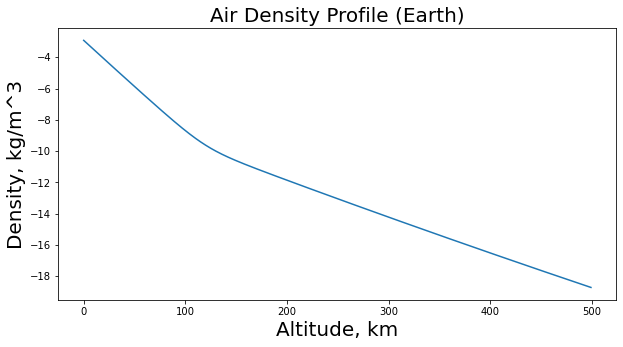

In [3]:
air_pressures = [get_p_ATM(i) for i in np.arange(500)]
altitude = np.arange(500)

plt.figure(figsize=(10,5))



plt.plot(altitude,np.log10(air_pressures))
plt.xlabel("Altitude, km", fontsize=20)
plt.ylabel("Density, kg/m^3", fontsize=20)

plt.title("Air Density Profile (Earth)", fontsize=20)
plt.savefig("plots/step-1-plot1.png")

## Step 2: ISS Orbit around earth

**1.**

In [4]:
T = np.pi*2*np.sqrt(((6771e5)**3) / ((6.672e-8) *(5.972e27)))

print("The period of the ISS is " + str(round(T, 2)) + " seconds")

The period of the ISS is 5545.89 seconds


**2.**

Number of Orbits Completed in time 5*T (estimated period) = 5.32


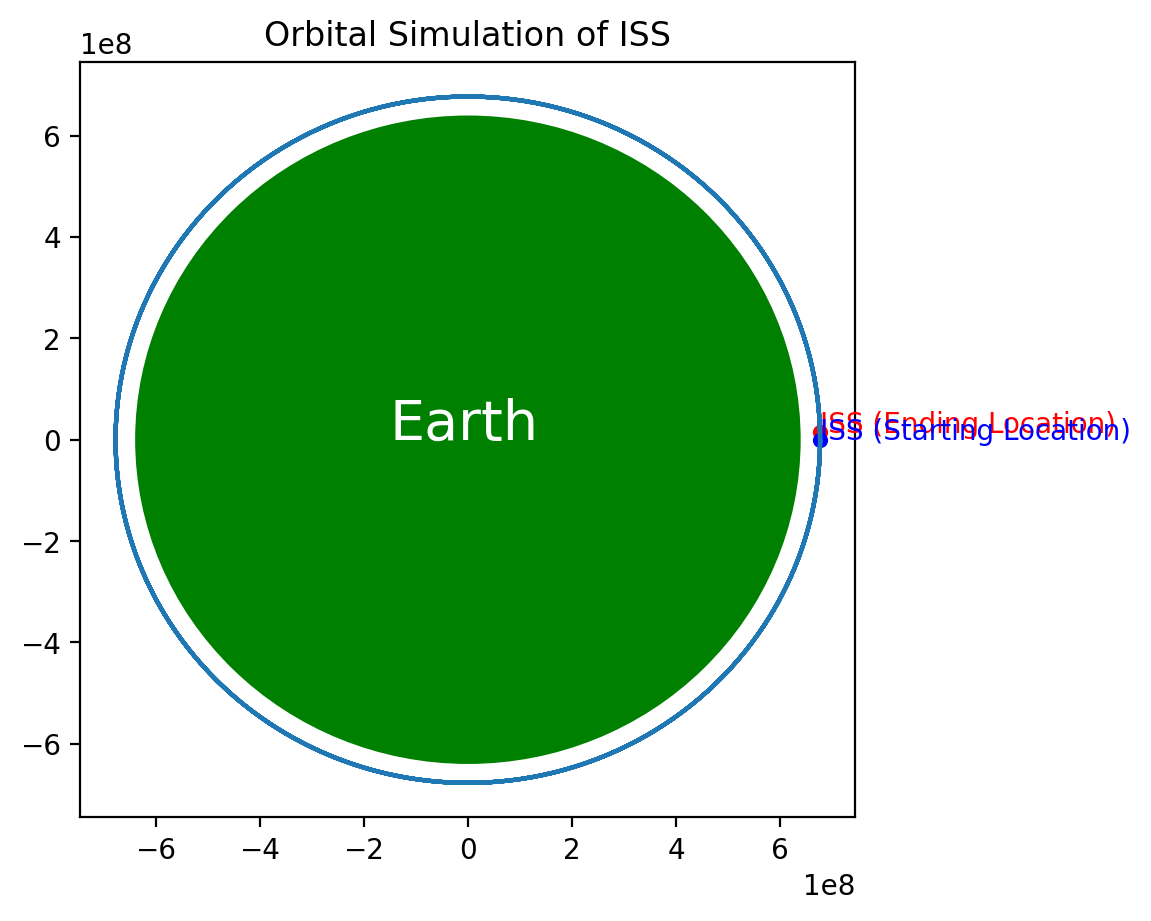

In [5]:
#Physical Parameters of Setup
GNewton = 6.672e-8
mass = 5.972e27

#Acceleration given x
def acc(x, y):
    rad2 = x**2 + y**2
    a = (- GNewton * mass / rad2)
    
    theta = np.arctan(np.abs(y / x))
    ax = a * np.cos(theta) * np.sign(x)
    ay = a * np.sin(theta) * np.sign(y)
    
    
    
    
    
    return ax, ay 

def leapfrog_step(dt, x, y, vx, vy):
    ax, ay = acc(x,y)
    
    new_vx_half = vx + ax * dt * 0.5
    new_vy_half = vy + ay * dt * 0.5
    
    new_x = x + new_vx_half * dt
    new_y = y + new_vy_half * dt
    
    ax, ay = acc(new_x, new_y)
    new_vx = new_vx_half + ax*dt*0.5
    new_vy = new_vy_half + ay*dt*0.5
    
    return new_x, new_y, new_vx, new_vy


def simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper = 'euler'):
    #Compute number of sim. steps necessary such that: dt * Nsteps > tend
    Nsteps = int((tend - tstart) / dt ) + 1

    #Define variables for step n.
    #These will be used to define step n+1.
    old_x = xstart
    old_y = ystart
    old_vx = vxstart
    old_vy = vystart
    old_t = tstart 

    #Record of values
    t = [old_t]
    x = [old_x]
    y = [old_y]
    vx = [old_vx]
    vy = [old_vy]
    distances = []
    angels = []
    
    for i in range(Nsteps):
        new_t = old_t + dt
        

        new_x, new_y, new_vx, new_vy = leapfrog_step(dt, old_x, old_y, old_vx, old_vy)
       
        

        #save
        t.append(new_t)
        x.append(new_x)
        y.append(new_y)
        vx.append(new_vx)
        vy.append(new_vy)
        
        

        distances.append(((((new_y-old_y)**2) + ((new_x- old_x)**2)) ** (1/2)))

        angels.append(np.arctan(np.abs(new_y / new_x)))
        # "new" is now the input for the next loop iteration
        old_t = new_t
        old_x = new_x
        old_y = new_y
        old_vx = new_vx
        old_vy = new_vy
        
        if (( (new_x**2) + (new_y**2) ) ** (1/2)) < 6371e5:
            print("Crash at " + str(round(new_t, 2)) +"seconds")
            plt.plot(x,y)
            
            x.append(new_x)
            y.append(new_y)
            Crashed=True
            return x,y, Crashed, distances
        
        
        
    #Simulation is done. Plot evolution of spring position
    plt.plot(x,y)
    #plt.scatter(t, y, c = 'k', s = 5)

    #Phase portrait: pos vs. velocity
    #plt.plot(y, v)
    Crashed=False
    return x, y, Crashed, distances, angels, vx, vy
    
#Initial Conditions
xstart = 6771e5
ystart = 0
vxstart = 0
vystart = ((GNewton*mass)/xstart)**(1/2) 

tstart = 0.0
tend = 5*T
dt = tend/1000

plt.figure(figsize=(5,5),dpi=200)
x, y, crash_status, distances, angels, vx, vy = simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper='leapfrog')

earth  = plt.Circle((0,0), 6371e5, color='green')
plt.gcf().gca().add_artist(earth)

if crash_status == False:
    plt.text(-150000000,0,"Earth", color="white", fontsize=20)

plt.text(x[len(x)-1],y[len(y)-1],"ISS (Ending Location)", color="red", fontsize=10)
plt.scatter(x[len(x)-1],y[len(y)-1], color="red", s=20)

plt.text(6771e5,0,"ISS (Starting Location)", color="blue", fontsize=10)
plt.scatter(6771e5,0, color="blue", s=20)

print("Number of Orbits Completed in time 5*T (estimated period) = " +str(round(sum(distances)/(2*np.pi*6371e5), 2)))

plt.title("Orbital Simulation of ISS")
plt.savefig("plots/step-2-plot1.png")

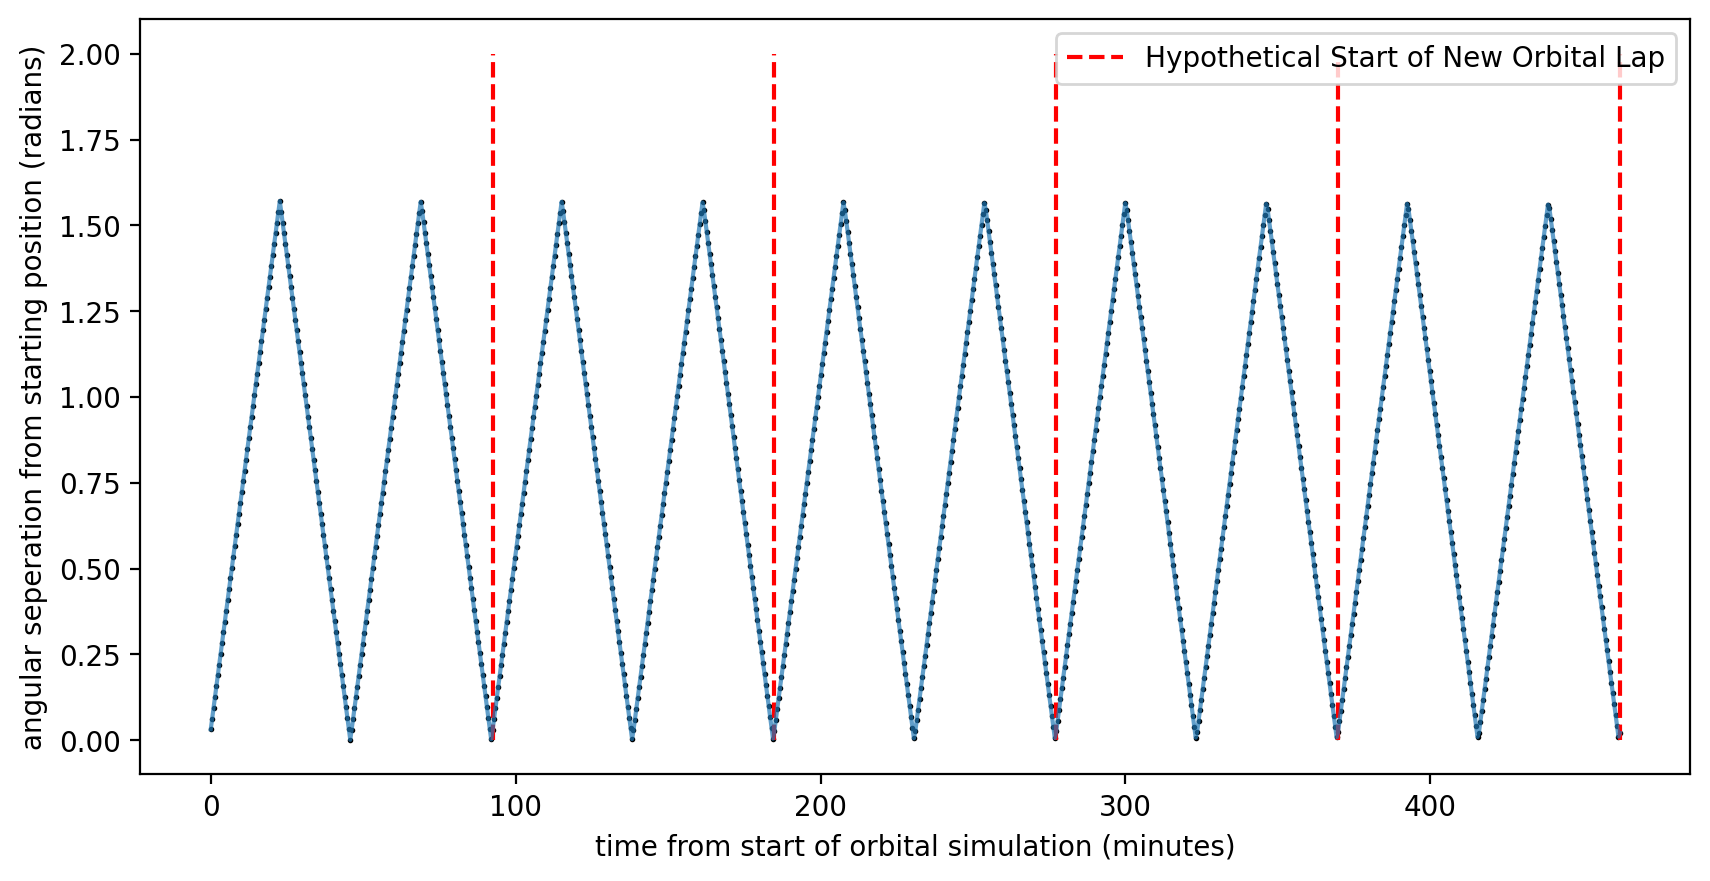

In [6]:
plt.figure(figsize=(10,5),dpi=200)
plt.plot(np.linspace(0, tend, len(angels))/60, angels, alpha=0.7)
plt.scatter(np.linspace(0, tend, len(angels))/60, angels,c="black", s=1)


plt.xlabel("time from start of orbital simulation (minutes)")
plt.ylabel("angular seperation from starting position (radians)")

plt.vlines(T/60,0,2,colors='red', linestyles='--',  label='Hypothetical Start of New Orbital Lap')
plt.vlines((2*T)/60,0,2,colors='red', linestyles='--')

plt.vlines((3*T)/60,0,2,colors='red', linestyles='--')

plt.vlines((4*T)/60,0,2,colors='red', linestyles='--')

plt.vlines((5*T)/60,0,2,colors='red', linestyles='--')




plt.legend()
plt.savefig("plots/step-2-plot2.png")

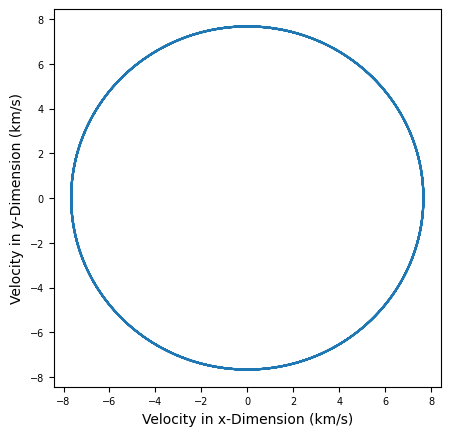

In [7]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(np.asarray(vx)/1e5,np.asarray(vy)/1e5)

plt.xlabel("Velocity in x-Dimension (km/s)")
plt.ylabel("Velocity in y-Dimension (km/s)")


plt.xticks(fontsize=7)
plt.yticks(fontsize=7)


plt.savefig("plots/step-2-plot3.png")

# Step 3: Air drag

**1.**

Crash at 615.59 seconds
Maximum absolute velocity achieved: 2.45423 km/s
Speed before impact: 0.04 km/s

Number of Orbits Completed  = 0.01


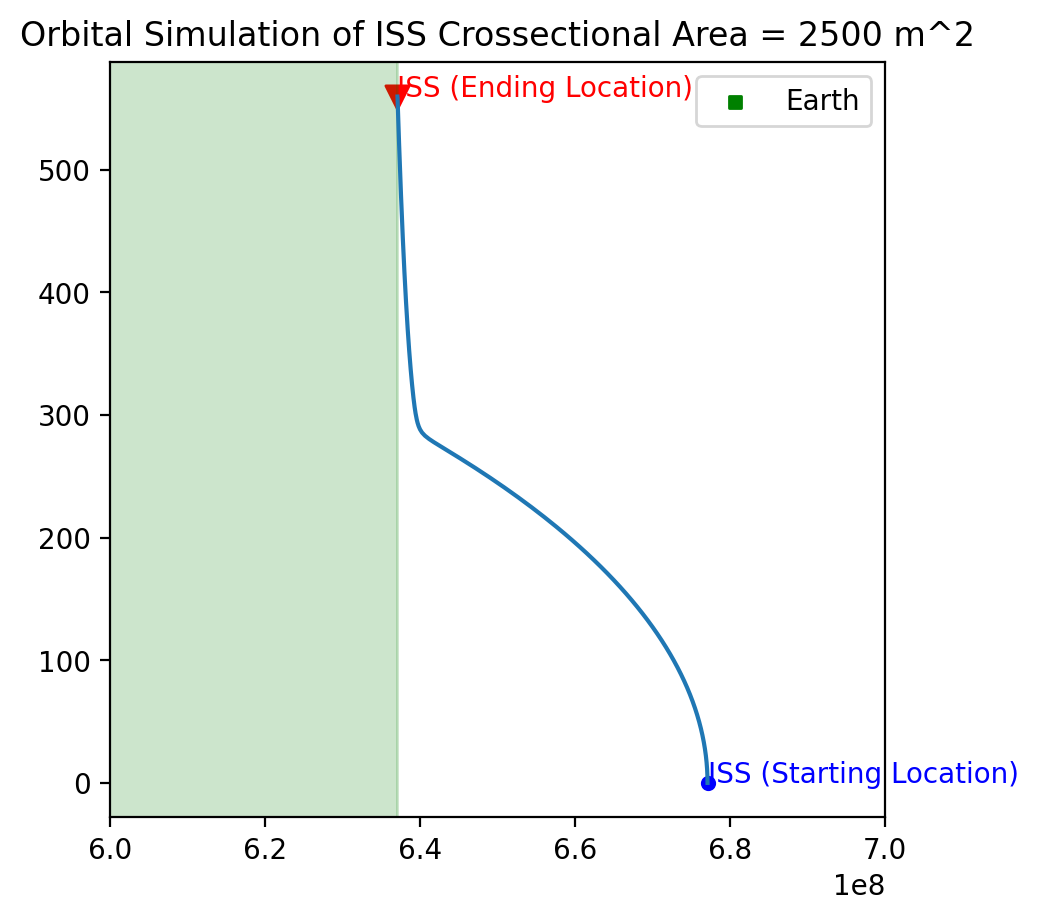

In [8]:
#Physical Parameters of Setup
GNewton = 6.672e-8
mass = 5.972e27
A = 2500*1e4

def acc(x, y, old_vx, old_vy):
    rad2 = x**2 + y**2
    a = (- GNewton * mass / rad2)
    
    theta = np.arctan(np.abs(y / x))
    ax = a * np.cos(theta) * np.sign(x)
    ay = a * np.sin(theta) * np.sign(y)
    
    dist_earth = ((x**2) + (y**2))**(1/2)
    
    ax = ax + (((-1/2)*(2)*get_p_ATM((dist_earth/1e5) - 6371)*(old_vx**2)*A*(np.sign(old_vx)))/(4.20e8))
    ay = ay + (((-1/2)*(2)*get_p_ATM((dist_earth/1e5) - 6371)*(old_vy**2)*A*(np.sign(old_vy)))/(4.20e8))

    
    return ax, ay 

def leapfrog_step(dt, x, y, vx, vy):
    ax, ay = acc(x,y, vx, vy)
    
    new_vx_half = vx + ax * dt * 0.5
    new_vy_half = vy + ay * dt * 0.5
    
    new_x = x + new_vx_half * dt
    new_y = y + new_vy_half * dt
    
    ax, ay = acc(new_x, new_y, vx, vy)
    new_vx = new_vx_half + ax*dt*0.5
    new_vy = new_vy_half + ay*dt*0.5
    
    return new_x, new_y, new_vx, new_vy


def simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper = 'euler'):
    #Compute number of sim. steps necessary such that: dt * Nsteps > tend
    Nsteps = int((tend - tstart) / dt ) + 1

    #Define variables for step n.
    #These will be used to define step n+1.
    old_x = xstart
    old_y = ystart
    old_vx = vxstart
    old_vy = vystart
    old_t = tstart 

    #Record of values
    t = [old_t]
    x = [old_x]
    y = [old_y]
    vx = [old_vx]
    vy = [old_vy]
    distances = []
    angels = [0]
    altitudes = [6771e5]
    
    for i in tqdm(range(Nsteps)):
        new_t = old_t + dt
        

        new_x, new_y, new_vx, new_vy = leapfrog_step(dt, old_x, old_y, old_vx, old_vy)
       


        #save
        t.append(new_t)
        x.append(new_x)
        y.append(new_y)
        vx.append(new_vx)
        vy.append(new_vy)
        altitudes.append(((new_x**2) + (new_y**2))**(1/2))

        distances.append(((((new_y-old_y)**2) + ((new_x- old_x)**2)) ** (1/2)))

        angels.append(((sum(distances) % (2*np.pi*6371e5))/(2*np.pi*6371e5)) * (np.pi*2))
        # "new" is now the input for the next loop iteration
        old_t = new_t
        old_x = new_x
        old_y = new_y
        old_vx = new_vx
        old_vy = new_vy
        
        if (( (new_x**2) + (new_y**2) ) ** (1/2)) < 6371e5:
            print("Crash at " + str(round(new_t, 2)) +" seconds") 
            vx = np.asarray(vx)
            vy = np.asarray(vy)
            v = ((vx**2) + (vy**2))**(1/2)
            print("Maximum absolute velocity achieved: " + str(round((max(max(v), min(v), key=abs)/1e5), 5)) +" km/s")
            print("Speed before impact: " + str(round(v[len(v)-1]/1e5,2)) +" km/s")
            plt.plot(x,y)
            Crashed=True
            return x, y, Crashed, distances, angels, vx, vy, altitudes
        
        
    #Simulation is done. Plot evolution of spring position
    plt.plot(x,y)
    #plt.scatter(t, y, c = 'k', s = 5)

    #Phase portrait: pos vs. velocity
    #plt.plot(y, v)
    Crashed=False
    return x, y, Crashed, distances, angels, vx, vy, altitudes
    
    
#Initial Conditions
xstart = 6771e5
ystart = 0
vxstart = 0
vystart = 1#((GNewton*mass)/xstart)**(1/2) 

tstart = 0.0
tend = 5*T
dt = tend/10000

plt.figure(figsize=(5,5),dpi=200)
x, y, crash_status, distances, angels, vx, vy, altitudes = simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper='leapfrog')

earth  = plt.Circle((0,0), 6371e5, color='green', alpha=0.2)
plt.gcf().gca().add_artist(earth)

if crash_status == False:
    plt.text(-150000000,0,"Earth", color="white", fontsize=20)

plt.text(x[len(x)-1],y[len(y)-1],"ISS (Ending Location)", color="red", fontsize=10)
plt.scatter(x[len(x)-1],y[len(y)-1], color="red", s=70, marker= "v")
plt.scatter(0,0, color="green",marker="s", s=20, label="Earth")


plt.text(6771e5,0,"ISS (Starting Location)", color="blue", fontsize=10)
plt.scatter(6771e5,0, color="blue", s=20)

print("Number of Orbits Completed  = " +str(round(sum(distances)/(2*np.pi*6371e5), 2)))

plt.title("Orbital Simulation of ISS Crossectional Area = " + str(2500) + " m^2")
plt.xlim(6000e5,7000e5)
plt.legend()
plt.savefig("plots/step-3-plot1.png")


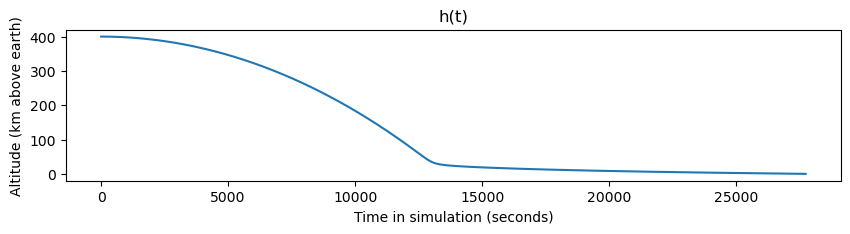

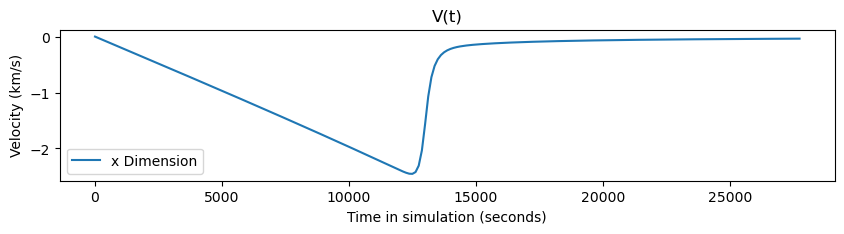

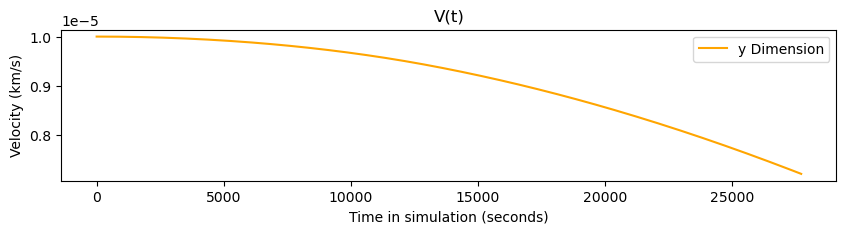

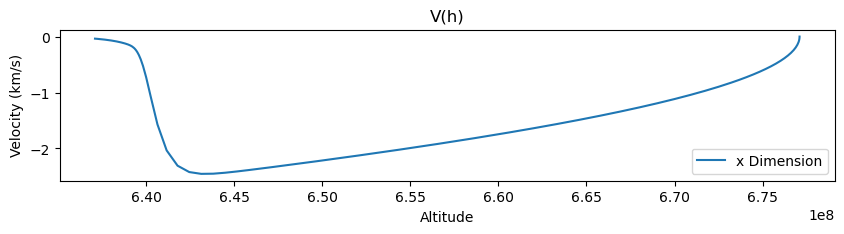

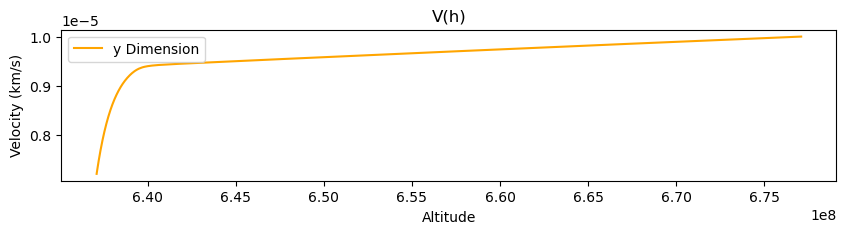

In [9]:

plt.figure(figsize=(10,2),dpi=100)
plt.plot( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371)
plt.title("h(t)")
plt.ylabel("Altitude (km above earth)")
plt.xlabel("Time in simulation (seconds)")
plt.savefig("plots/step-3-plot2.png")



plt.figure(figsize=(10,2),dpi=100)
plt.plot( np.linspace(0, tend, len(vx)), (np.asarray(vx)/1e5), label="x Dimension")
#plt.plot( np.linspace(0, tend, len(vy)), (np.asarray(vy)/1e5), label="y Dimension")


plt.title("V(t)")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Time in simulation (seconds)")
plt.legend()
plt.savefig("plots/step-3-plot3.png")



plt.figure(figsize=(10,2),dpi=100)
#plt.plot( np.linspace(0, tend, len(vx)), (np.asarray(vx)/1e5), label="x Dimension")
plt.plot( np.linspace(0, tend, len(vy)), (np.asarray(vy)/1e5), label="y Dimension", c="orange")


plt.title("V(t)")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Time in simulation (seconds)")
plt.legend()
plt.savefig("plots/step-3-plot4.png")



plt.figure(figsize=(10,2),dpi=100)
plt.plot( altitudes, (np.asarray(vx)/1e5), label="x Dimension")
#plt.plot( altitudes, (np.asarray(vy)/1e5), label="y Dimension")


plt.title("V(h)")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Altitude")
plt.legend()
plt.savefig("plots/step-3-plot5.png")



plt.figure(figsize=(10,2),dpi=100)
#plt.plot( altitudes, (np.asarray(vx)/1e5), label="x Dimension")
plt.plot( altitudes, (np.asarray(vy)/1e5), label="y Dimension", c="orange")


plt.title("V(h)")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Altitude")
plt.legend()
plt.savefig("plots/step-3-plot6.png")



Crash at 316.12 seconds
Maximum absolute velocity achieved: 2.5465 km/s
Speed before impact: 0.25 km/s

Number of Orbits Completed  = 0.01


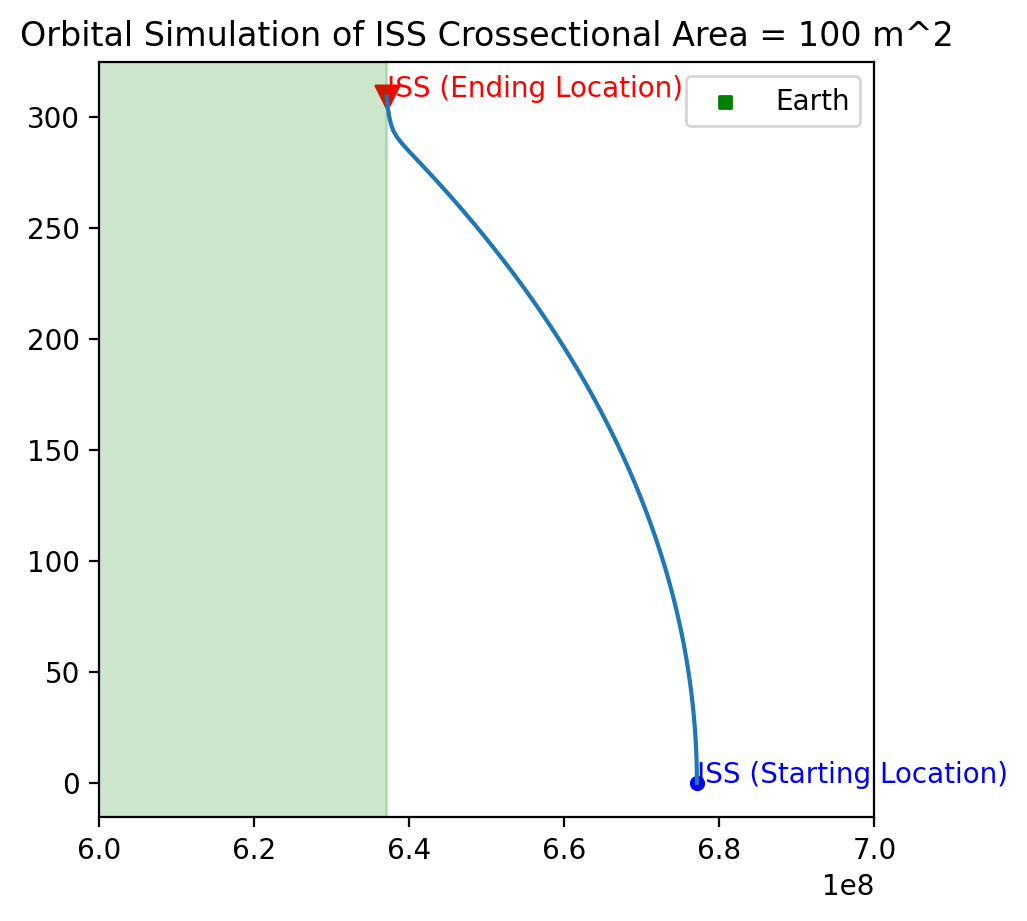

In [10]:
#Physical Parameters of Setup
GNewton = 6.672e-8
mass = 5.972e27
A = 100*1e4

#Initial Conditions
xstart = 6771e5
ystart = 0
vxstart = 0
vystart = 1#((GNewton*mass)/xstart)**(1/2) 

tstart = 0.0
tend = 5*T
dt = tend/10000

plt.figure(figsize=(5,5),dpi=200)
x, y, crash_status, distances, angels, vx, vy, altitudes = simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper='leapfrog')

earth  = plt.Circle((0,0), 6371e5, color='green', alpha=0.2)
plt.gcf().gca().add_artist(earth)

if crash_status == False:
    plt.text(-150000000,0,"Earth", color="white", fontsize=20)

plt.text(x[len(x)-1],y[len(y)-1],"ISS (Ending Location)", color="red", fontsize=10)
plt.scatter(x[len(x)-1],y[len(y)-1], color="red", s=70, marker= "v")
plt.scatter(0,0, color="green",marker="s", s=20, label="Earth")


plt.text(6771e5,0,"ISS (Starting Location)", color="blue", fontsize=10)
plt.scatter(6771e5,0, color="blue", s=20)

print("Number of Orbits Completed  = " +str(round(sum(distances)/(2*np.pi*6371e5), 2)))

plt.title("Orbital Simulation of ISS Crossectional Area = " + str(100) + " m^2")
plt.xlim(6000e5,7000e5)
plt.legend()
plt.savefig("plots/step-3-plot7.png")




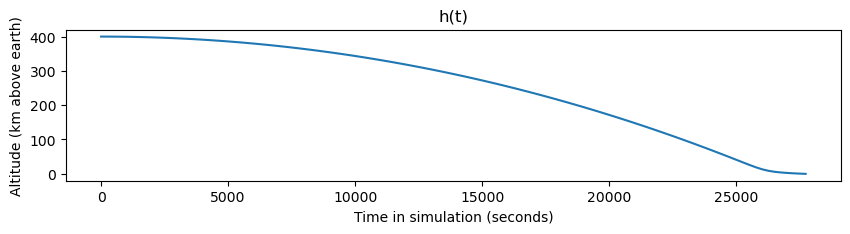

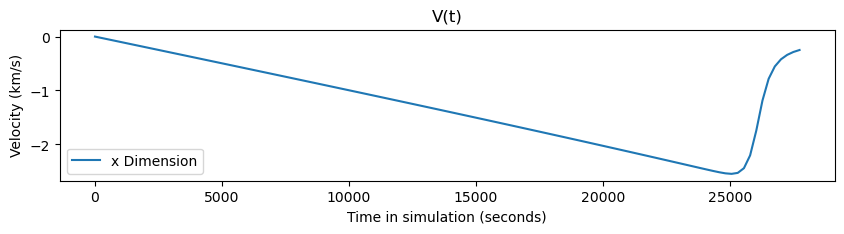

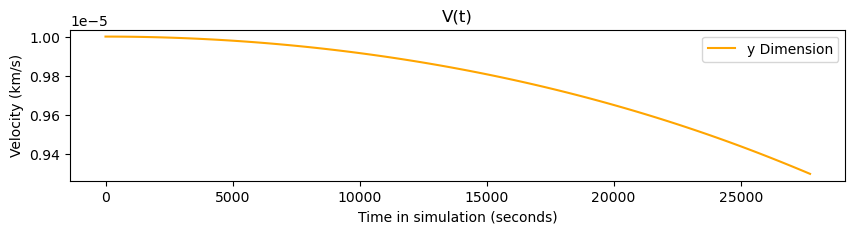

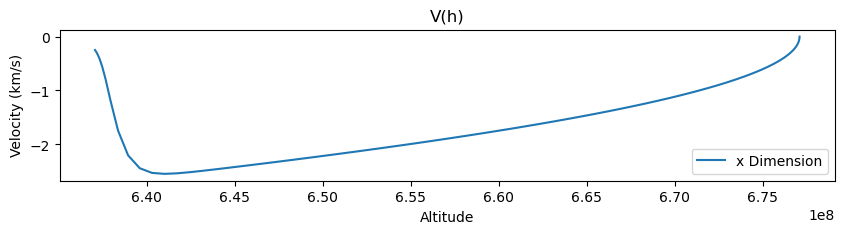

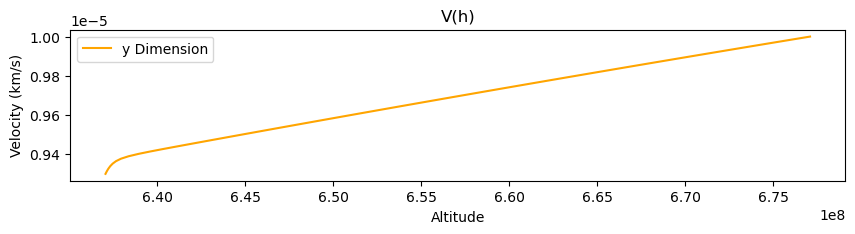

In [11]:

plt.figure(figsize=(10,2),dpi=100)
plt.plot( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371)
plt.title("h(t)")
plt.ylabel("Altitude (km above earth)")
plt.xlabel("Time in simulation (seconds)")
plt.savefig("plots/step-3-plot8.png")


plt.figure(figsize=(10,2),dpi=100)
plt.plot( np.linspace(0, tend, len(vx)), (np.asarray(vx)/1e5), label="x Dimension")
#plt.plot( np.linspace(0, tend, len(vy)), (np.asarray(vy)/1e5), label="y Dimension")


plt.title("V(t)")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Time in simulation (seconds)")
plt.legend()
plt.savefig("plots/step-3-plot9.png")



plt.figure(figsize=(10,2),dpi=100)
#plt.plot( np.linspace(0, tend, len(vx)), (np.asarray(vx)/1e5), label="x Dimension")
plt.plot( np.linspace(0, tend, len(vy)), (np.asarray(vy)/1e5), label="y Dimension", c="orange")


plt.title("V(t)")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Time in simulation (seconds)")
plt.legend()
plt.savefig("plots/step-3-plot10.png")



plt.figure(figsize=(10,2),dpi=100)
plt.plot( altitudes, (np.asarray(vx)/1e5), label="x Dimension")
#plt.plot( altitudes, (np.asarray(vy)/1e5), label="y Dimension")


plt.title("V(h)")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Altitude")
plt.legend()
plt.savefig("plots/step-3-plot11.png")



plt.figure(figsize=(10,2),dpi=100)
#plt.plot( altitudes, (np.asarray(vx)/1e5), label="x Dimension")
plt.plot( altitudes, (np.asarray(vy)/1e5), label="y Dimension", c="orange")


plt.title("V(h)")
plt.ylabel("Velocity (km/s)")
plt.xlabel("Altitude")
plt.legend()
plt.savefig("plots/step-3-plot12.png")



## Step 5: The ISS is Hit!


Number of Orbits Completed  = 26.82


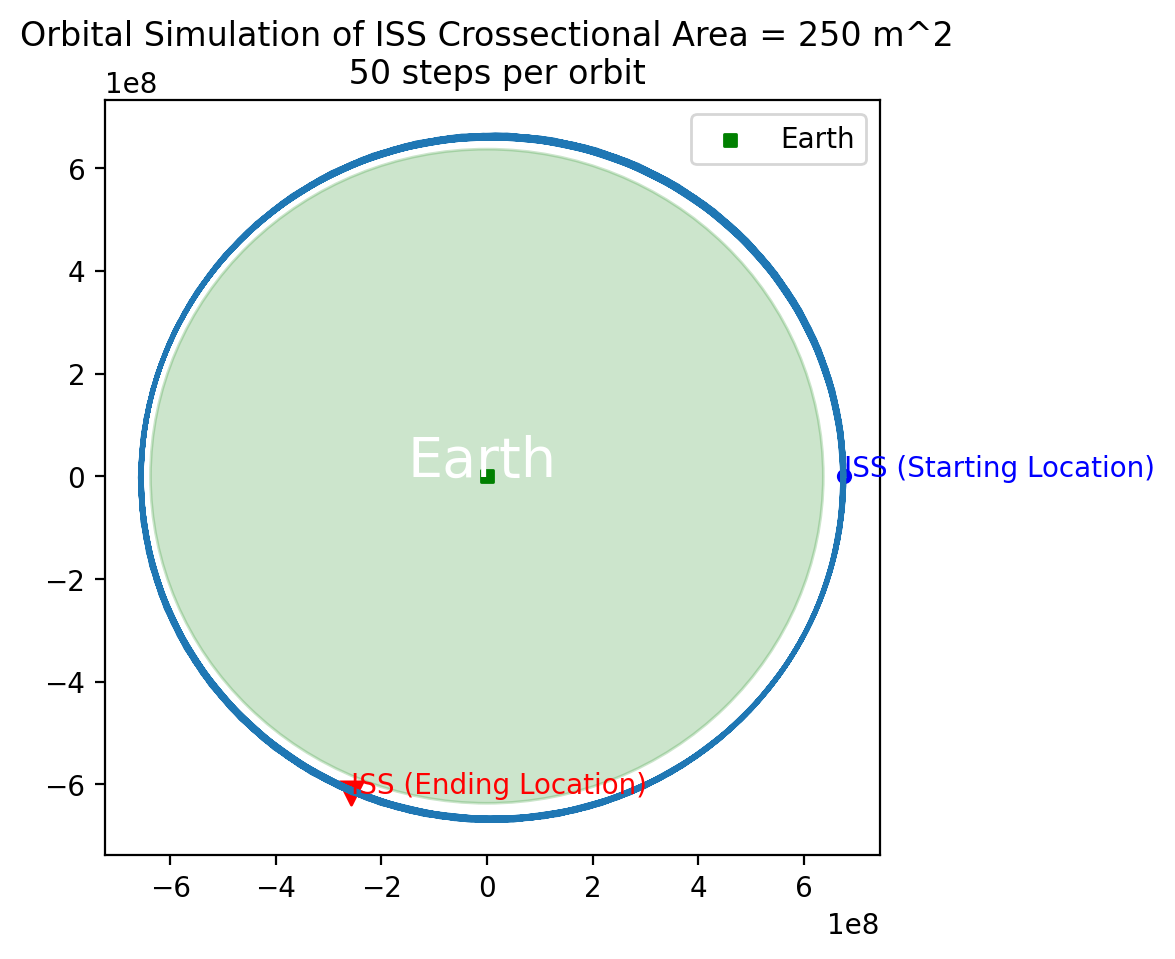

<Figure size 432x288 with 0 Axes>

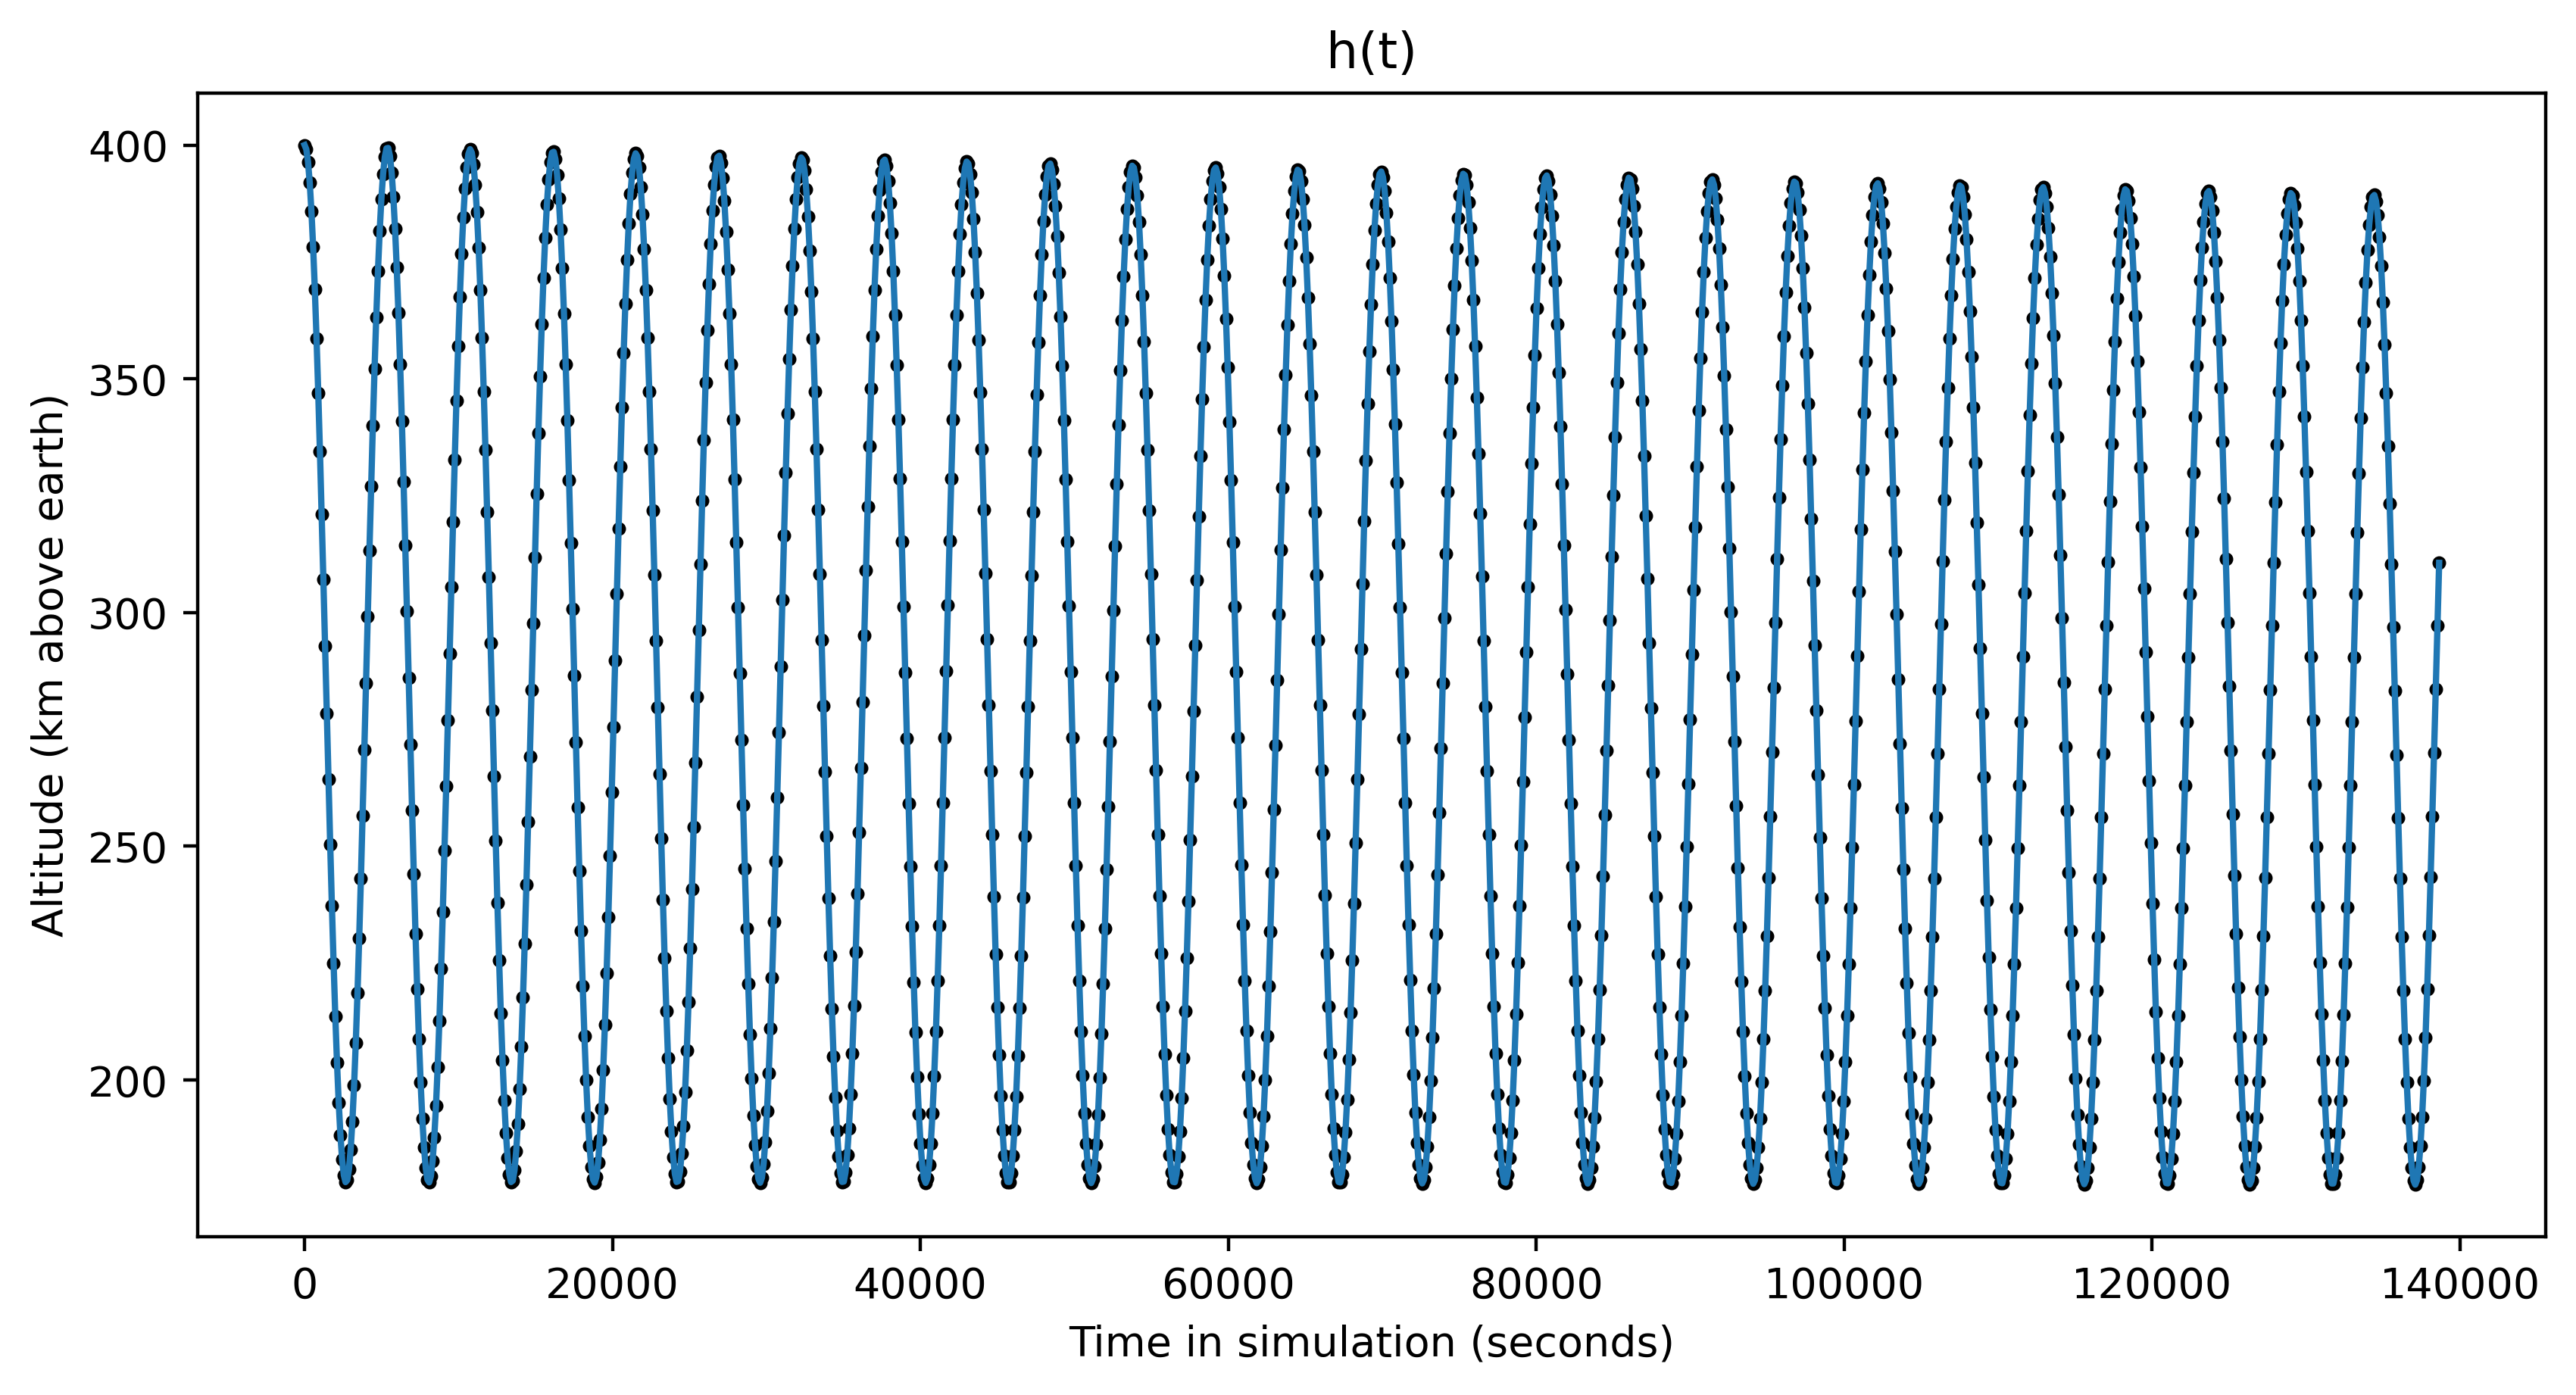

In [12]:
#Physical Parameters of Setup
GNewton = 6.672e-8
mass = 5.972e27
A = 250*1e4

#Initial Conditions
xstart = 6771e5
ystart = 0
vxstart = 0
vystart = ((GNewton*mass)/xstart)**(1/2) - (80e2)

tstart = 0.0
tend = 25*T
dt = tend/(50*25)

plt.figure(figsize=(5,5),dpi=200)
x, y, crash_status, distances, angels, vx, vy, altitudes = simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper='leapfrog')

earth  = plt.Circle((0,0), 6371e5, color='green', alpha=0.2)
plt.gcf().gca().add_artist(earth)

if crash_status == False:
    plt.text(-150000000,0,"Earth", color="white", fontsize=20)

plt.text(x[len(x)-1],y[len(y)-1],"ISS (Ending Location)", color="red", fontsize=10)
plt.scatter(x[len(x)-1],y[len(y)-1], color="red", s=70, marker= "v")
plt.scatter(0,0, color="green",marker="s", s=20, label="Earth")


plt.text(6771e5,0,"ISS (Starting Location)", color="blue", fontsize=10)
plt.scatter(6771e5,0, color="blue", s=20)

print("Number of Orbits Completed  = " +str(round(sum(distances)/(2*np.pi*6371e5), 2)))

plt.title("Orbital Simulation of ISS Crossectional Area = " + str(250) + " m^2 \n 50 steps per orbit")

plt.legend()
plt.figure()




plt.figure(figsize=(10,5),dpi=400)
plt.plot( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371)
plt.scatter( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371, c="black", s=5)


plt.title("h(t)")
plt.ylabel("Altitude (km above earth)")
plt.xlabel("Time in simulation (seconds)")
plt.savefig("plots/step-5-plot1.png")




Number of Orbits Completed  = 26.91


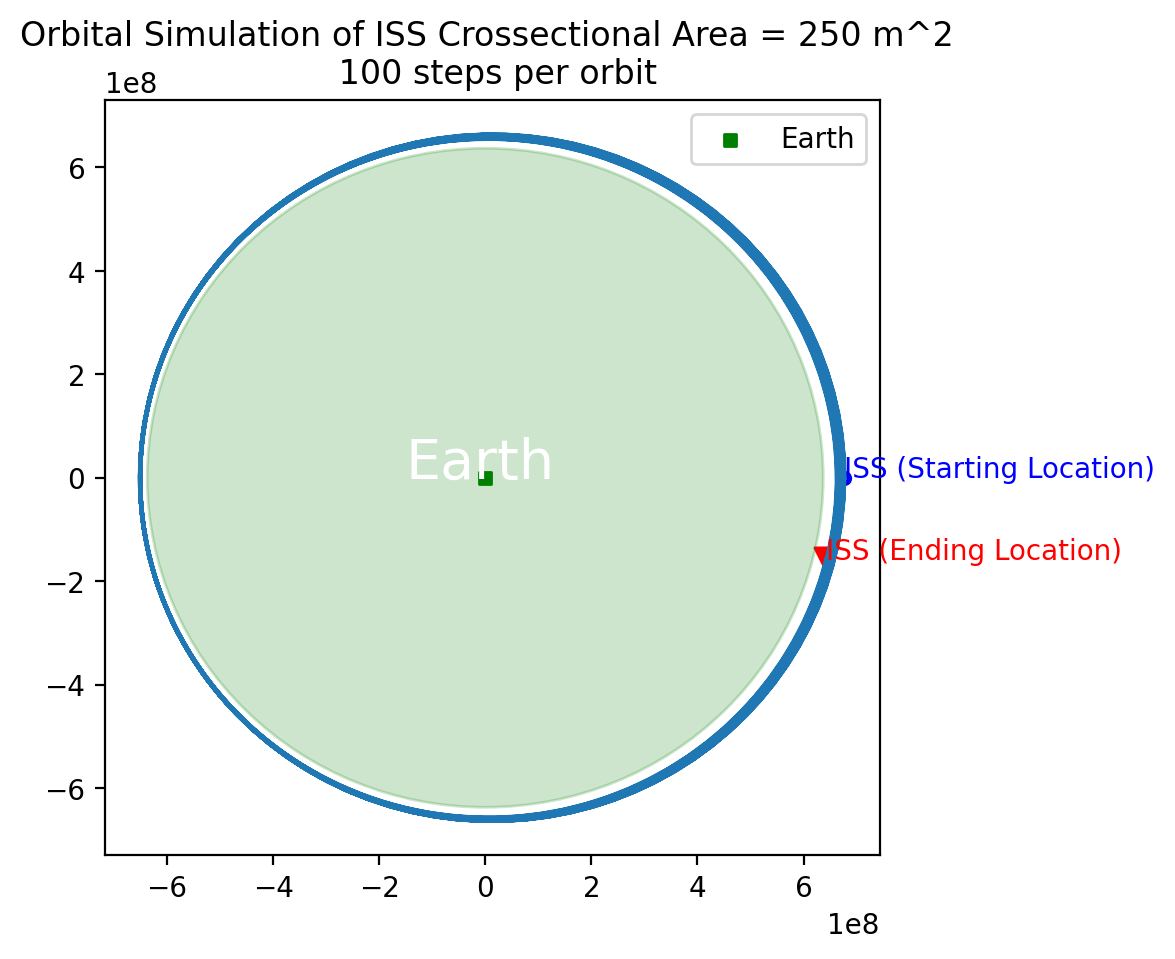

<Figure size 432x288 with 0 Axes>

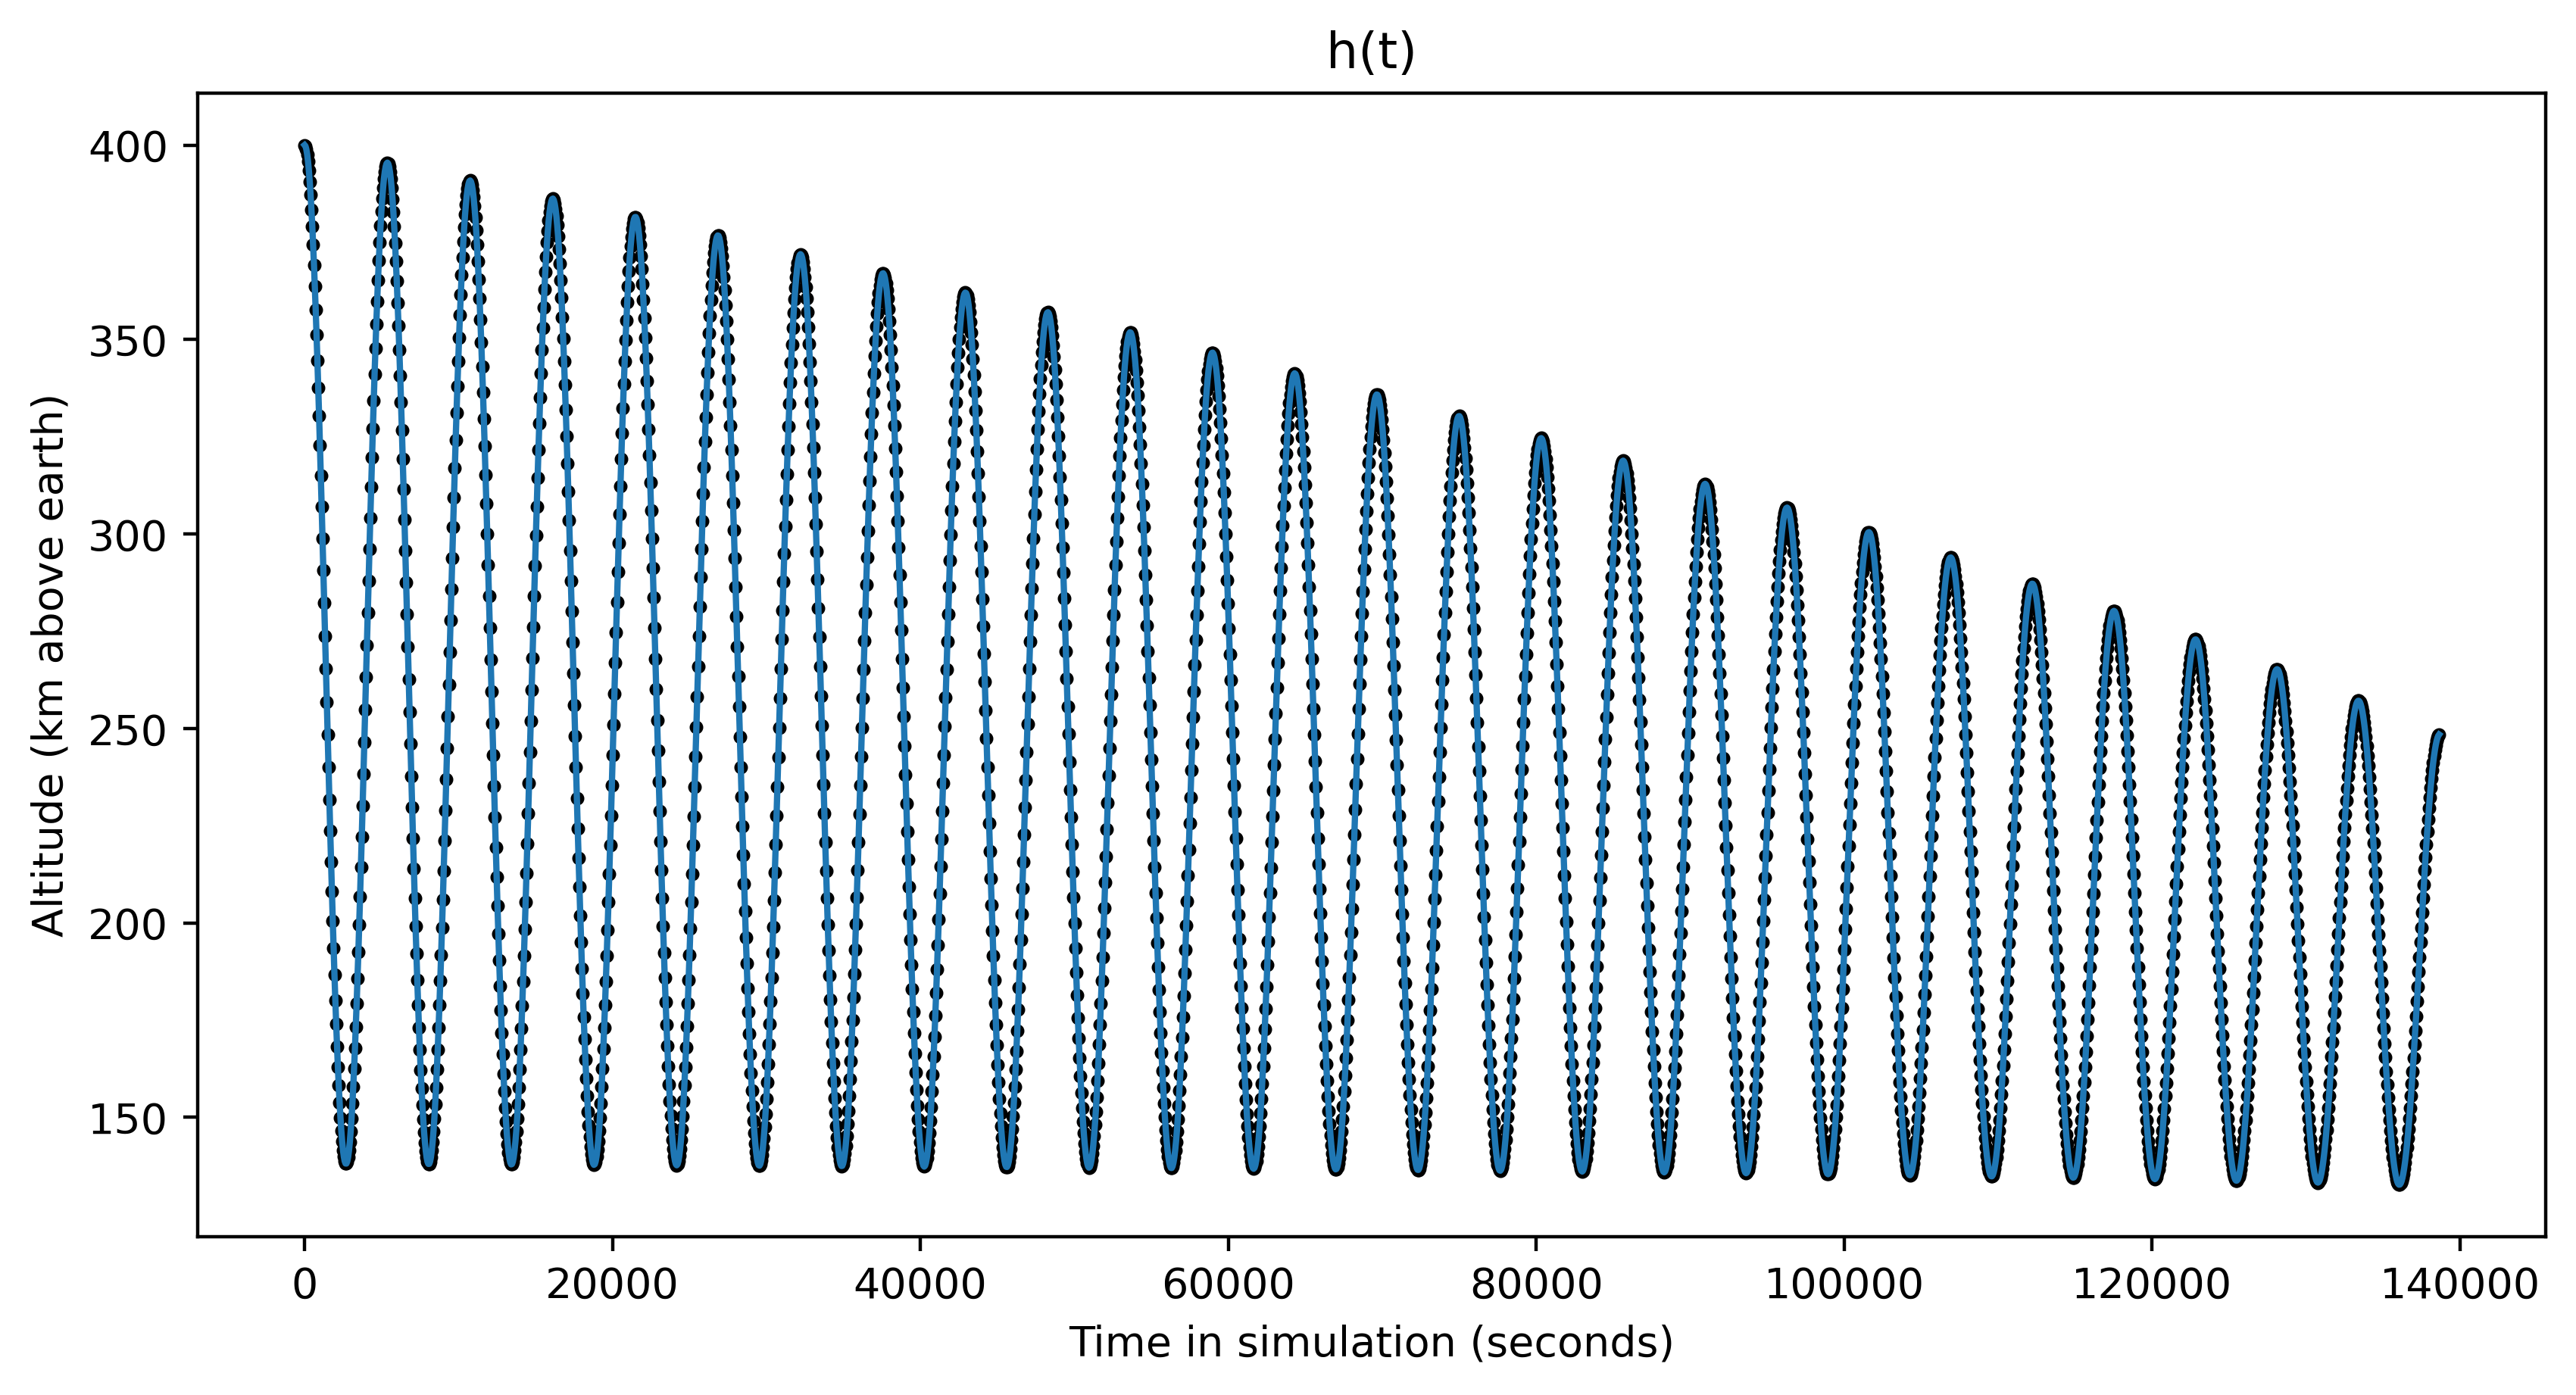

In [13]:
#Physical Parameters of Setup
GNewton = 6.672e-8
mass = 5.972e27
A = 250*1e4

#Initial Conditions
xstart = 6771e5
ystart = 0
vxstart = 0
vystart = ((GNewton*mass)/xstart)**(1/2) - (80e2)

tstart = 0.0
tend = 25*T
dt = tend/(100*25)

plt.figure(figsize=(5,5),dpi=200)
x, y, crash_status, distances, angels, vx, vy, altitudes = simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper='leapfrog')

earth  = plt.Circle((0,0), 6371e5, color='green', alpha=0.2)
plt.gcf().gca().add_artist(earth)

if crash_status == False:
    plt.text(-150000000,0,"Earth", color="white", fontsize=20)

plt.text(x[len(x)-1],y[len(y)-1],"ISS (Ending Location)", color="red", fontsize=10)
plt.scatter(x[len(x)-1],y[len(y)-1], color="red", s=70, marker= "v")
plt.scatter(0,0, color="green",marker="s", s=20, label="Earth")


plt.text(6771e5,0,"ISS (Starting Location)", color="blue", fontsize=10)
plt.scatter(6771e5,0, color="blue", s=20)

print("Number of Orbits Completed  = " +str(round(sum(distances)/(2*np.pi*6371e5), 2)))

plt.title("Orbital Simulation of ISS Crossectional Area = " + str(250) + " m^2 \n 100 steps per orbit")
plt.legend()
plt.figure()




plt.figure(figsize=(10,5),dpi=400)
plt.plot( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371)
plt.scatter( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371, c="black", s=5)


plt.title("h(t)")
plt.ylabel("Altitude (km above earth)")
plt.xlabel("Time in simulation (seconds)")
plt.savefig("plots/step-5-plot2.png")




Crash at 72545.77 seconds
Maximum absolute velocity achieved: 7.91115 km/s
Speed before impact: 0.14 km/s

Number of Orbits Completed  = 14.07


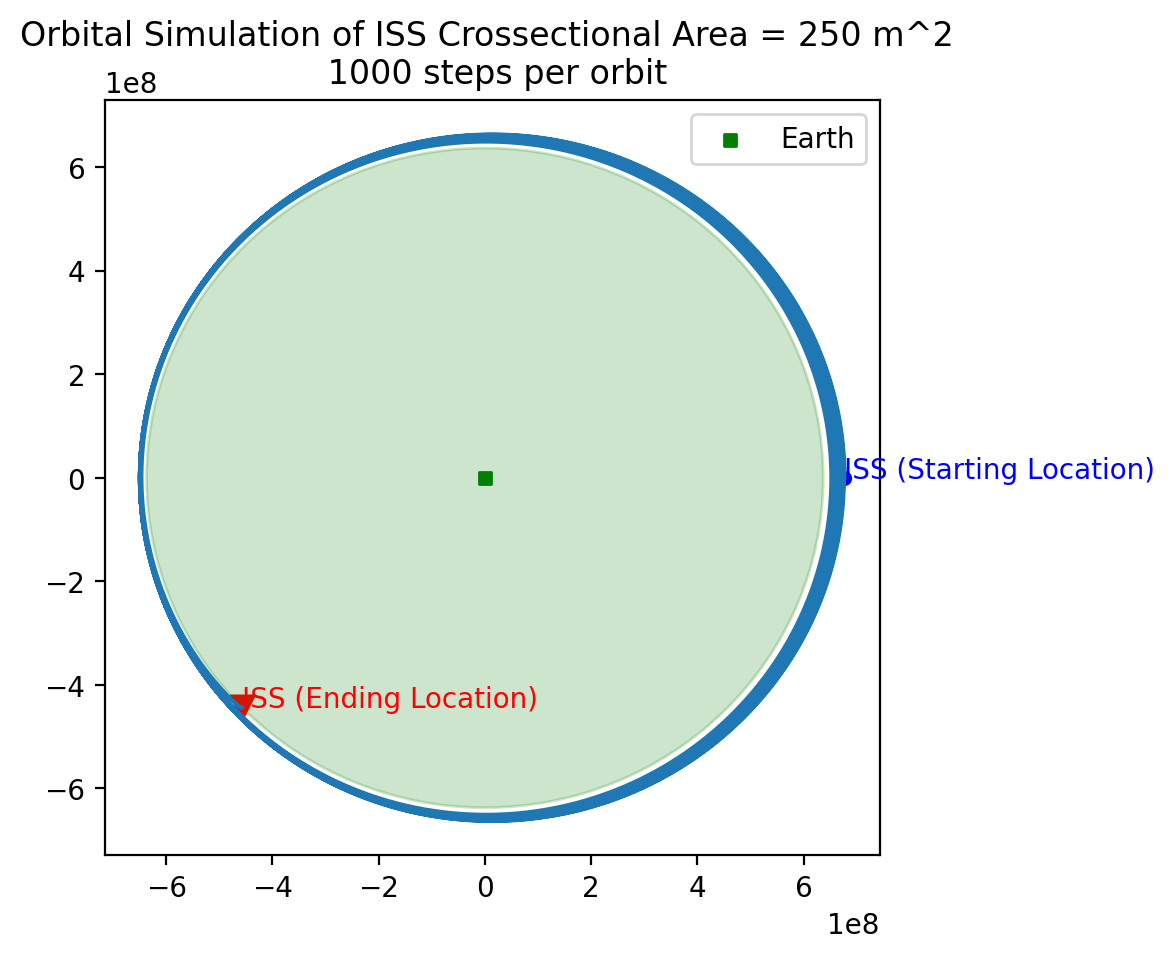

<Figure size 432x288 with 0 Axes>

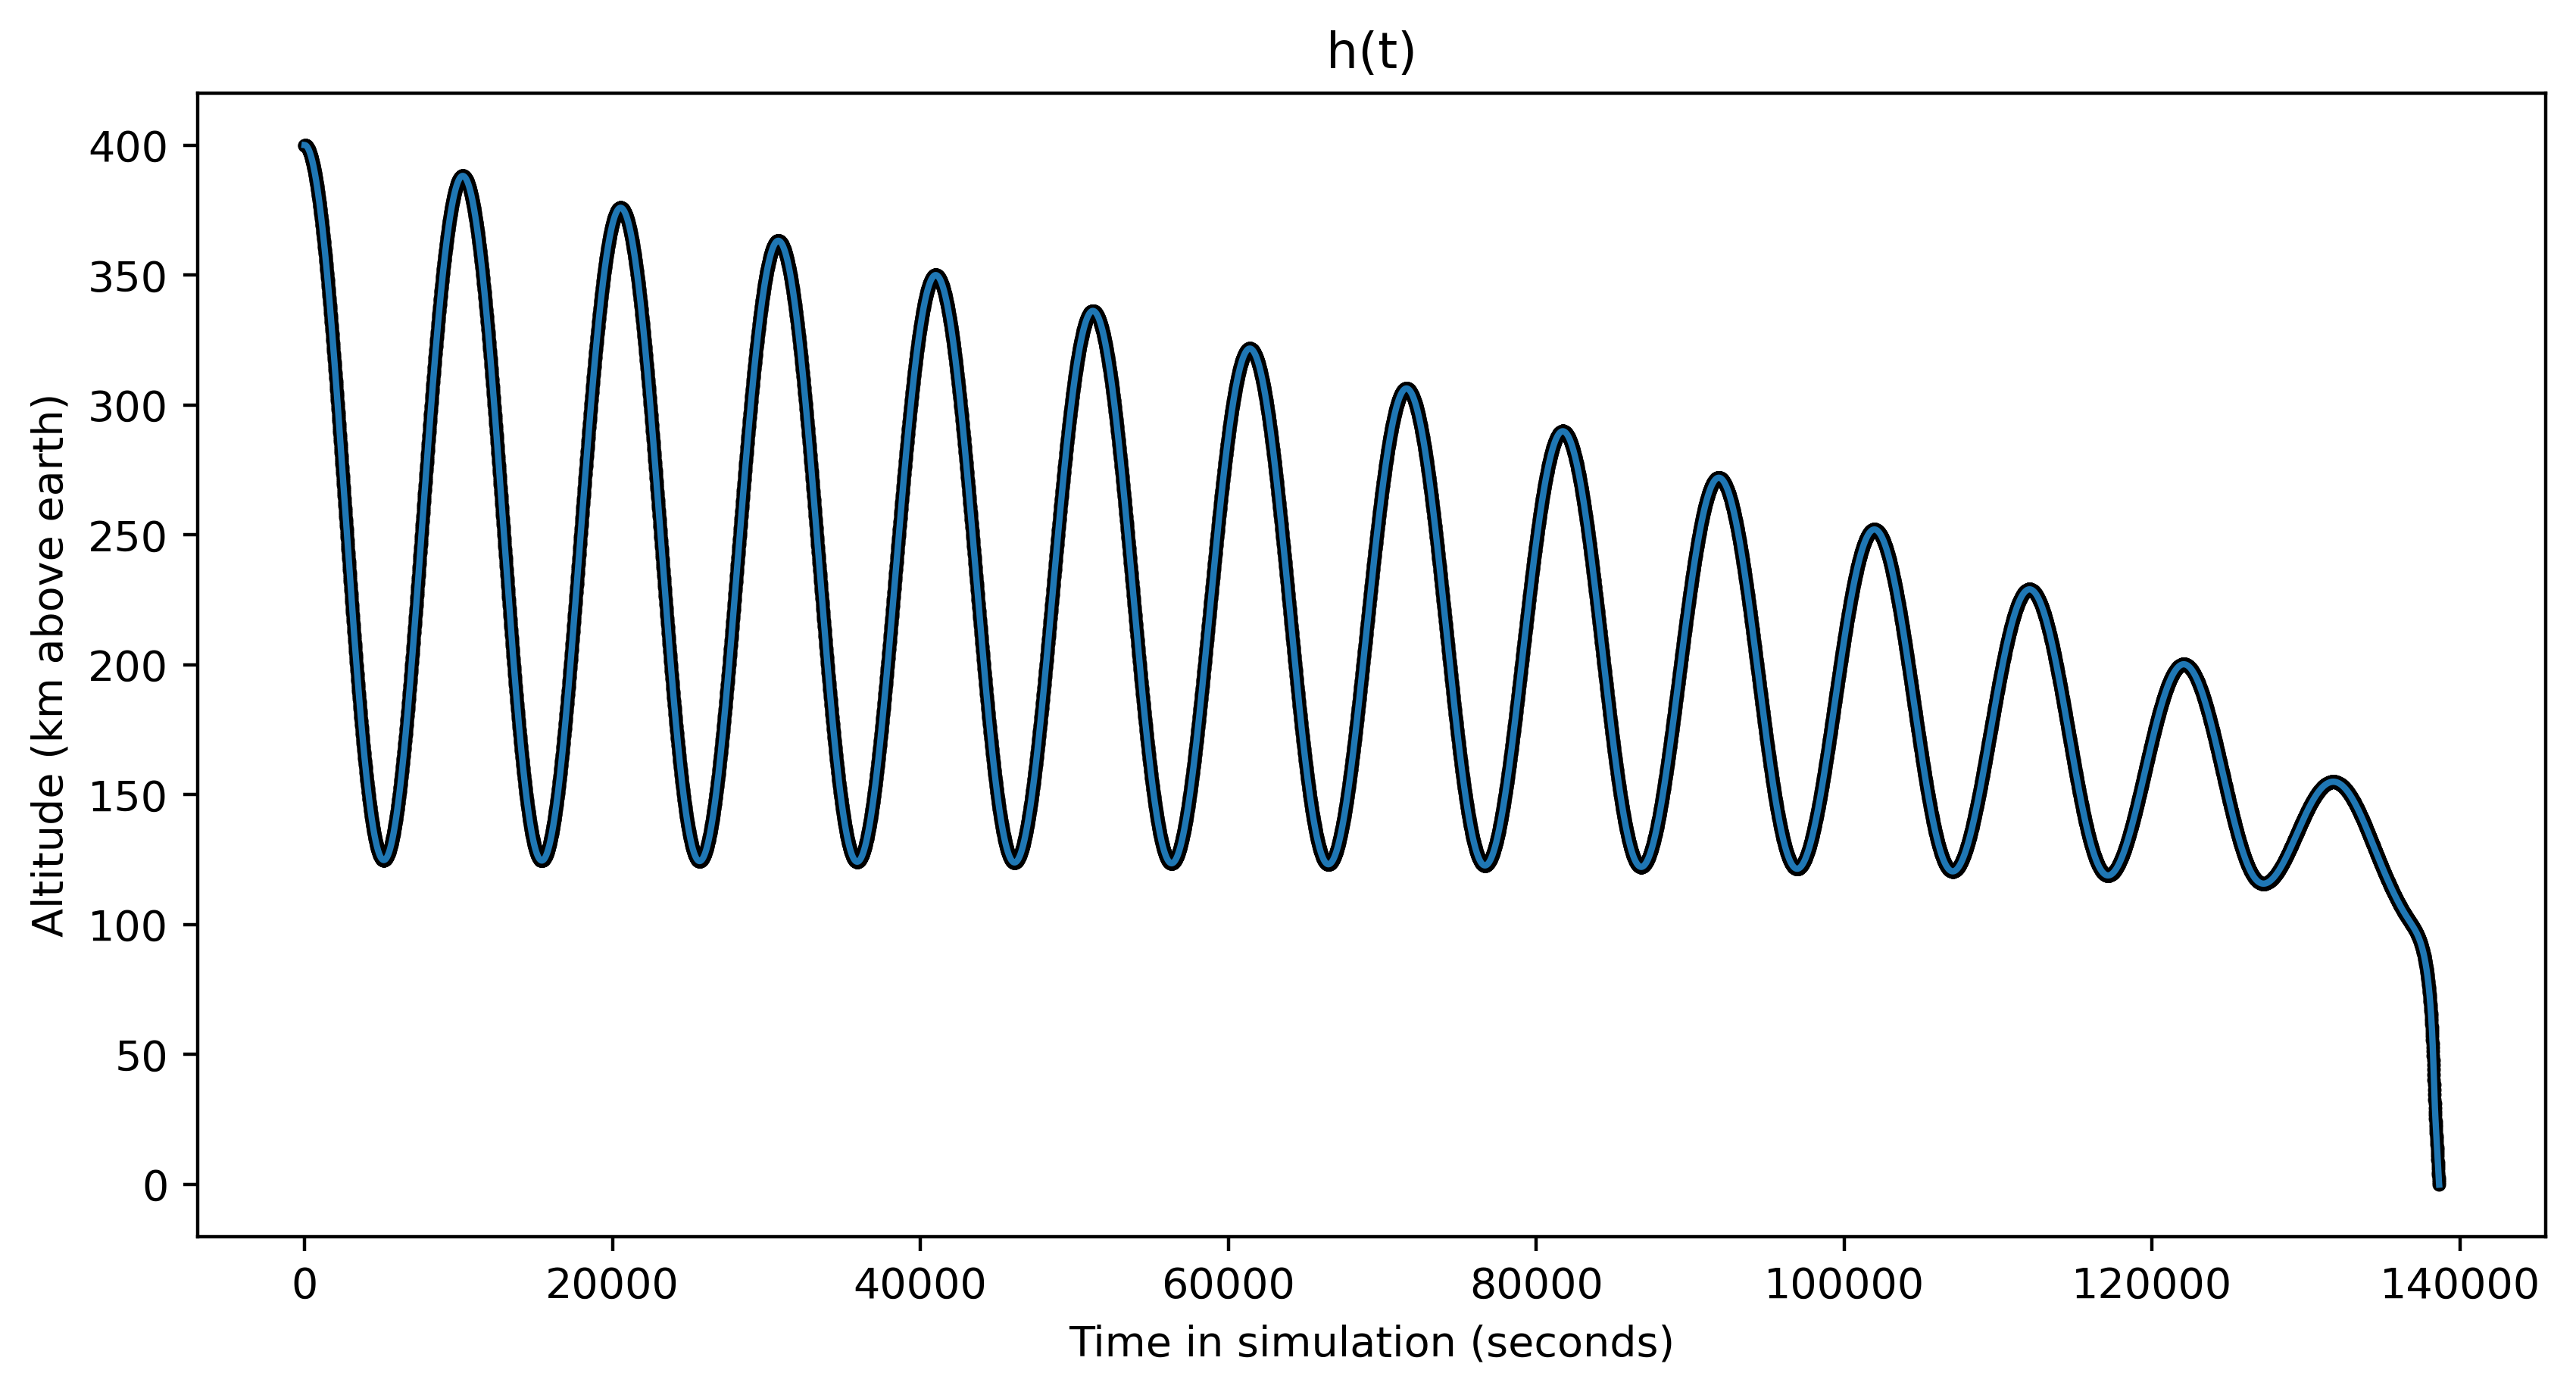

In [14]:
#Physical Parameters of Setup
GNewton = 6.672e-8
mass = 5.972e27
A = 250*1e4

#Initial Conditions
xstart = 6771e5
ystart = 0
vxstart = 0
vystart = ((GNewton*mass)/xstart)**(1/2) - (80e2)

tstart = 0.0
tend = 25*T
dt = tend/(1000*25)

plt.figure(figsize=(5,5),dpi=200)
x, y, crash_status, distances, angels, vx, vy, altitudes = simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper='leapfrog')

earth  = plt.Circle((0,0), 6371e5, color='green', alpha=0.2)
plt.gcf().gca().add_artist(earth)

if crash_status == False:
    plt.text(-150000000,0,"Earth", color="white", fontsize=20)

plt.text(x[len(x)-1],y[len(y)-1],"ISS (Ending Location)", color="red", fontsize=10)
plt.scatter(x[len(x)-1],y[len(y)-1], color="red", s=70, marker= "v")
plt.scatter(0,0, color="green",marker="s", s=20, label="Earth")


plt.text(6771e5,0,"ISS (Starting Location)", color="blue", fontsize=10)
plt.scatter(6771e5,0, color="blue", s=20)

print("Number of Orbits Completed  = " +str(round(sum(distances)/(2*np.pi*6371e5), 2)))

plt.title("Orbital Simulation of ISS Crossectional Area = " + str(250) + " m^2 \n 1000 steps per orbit")
plt.legend()
plt.figure()




plt.figure(figsize=(10,5),dpi=400)
plt.plot( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371)
plt.scatter( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371, c="black", s=5)


plt.title("h(t)")
plt.ylabel("Altitude (km above earth)")
plt.xlabel("Time in simulation (seconds)")
plt.savefig("plots/step-5-plot3.png")





# WARNING: This next cell takes ~ 10 minutes to run. You can skip it, and the rest of the cells will run just fine.

Crash at 72061.43 seconds
Maximum absolute velocity achieved: 7.91128 km/s
Speed before impact: 0.13 km/s

Number of Orbits Completed  = 13.99


<Figure size 432x288 with 0 Axes>

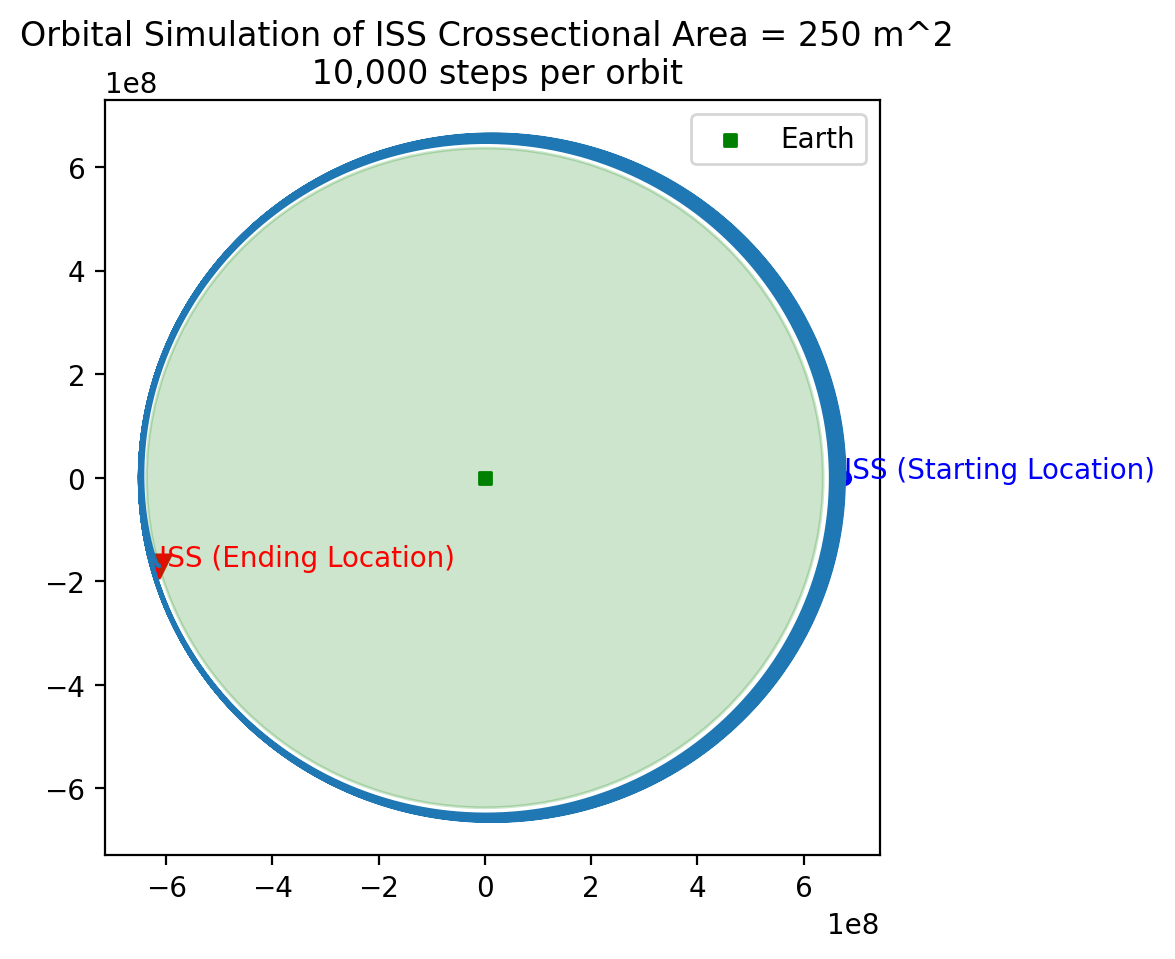

<Figure size 432x288 with 0 Axes>

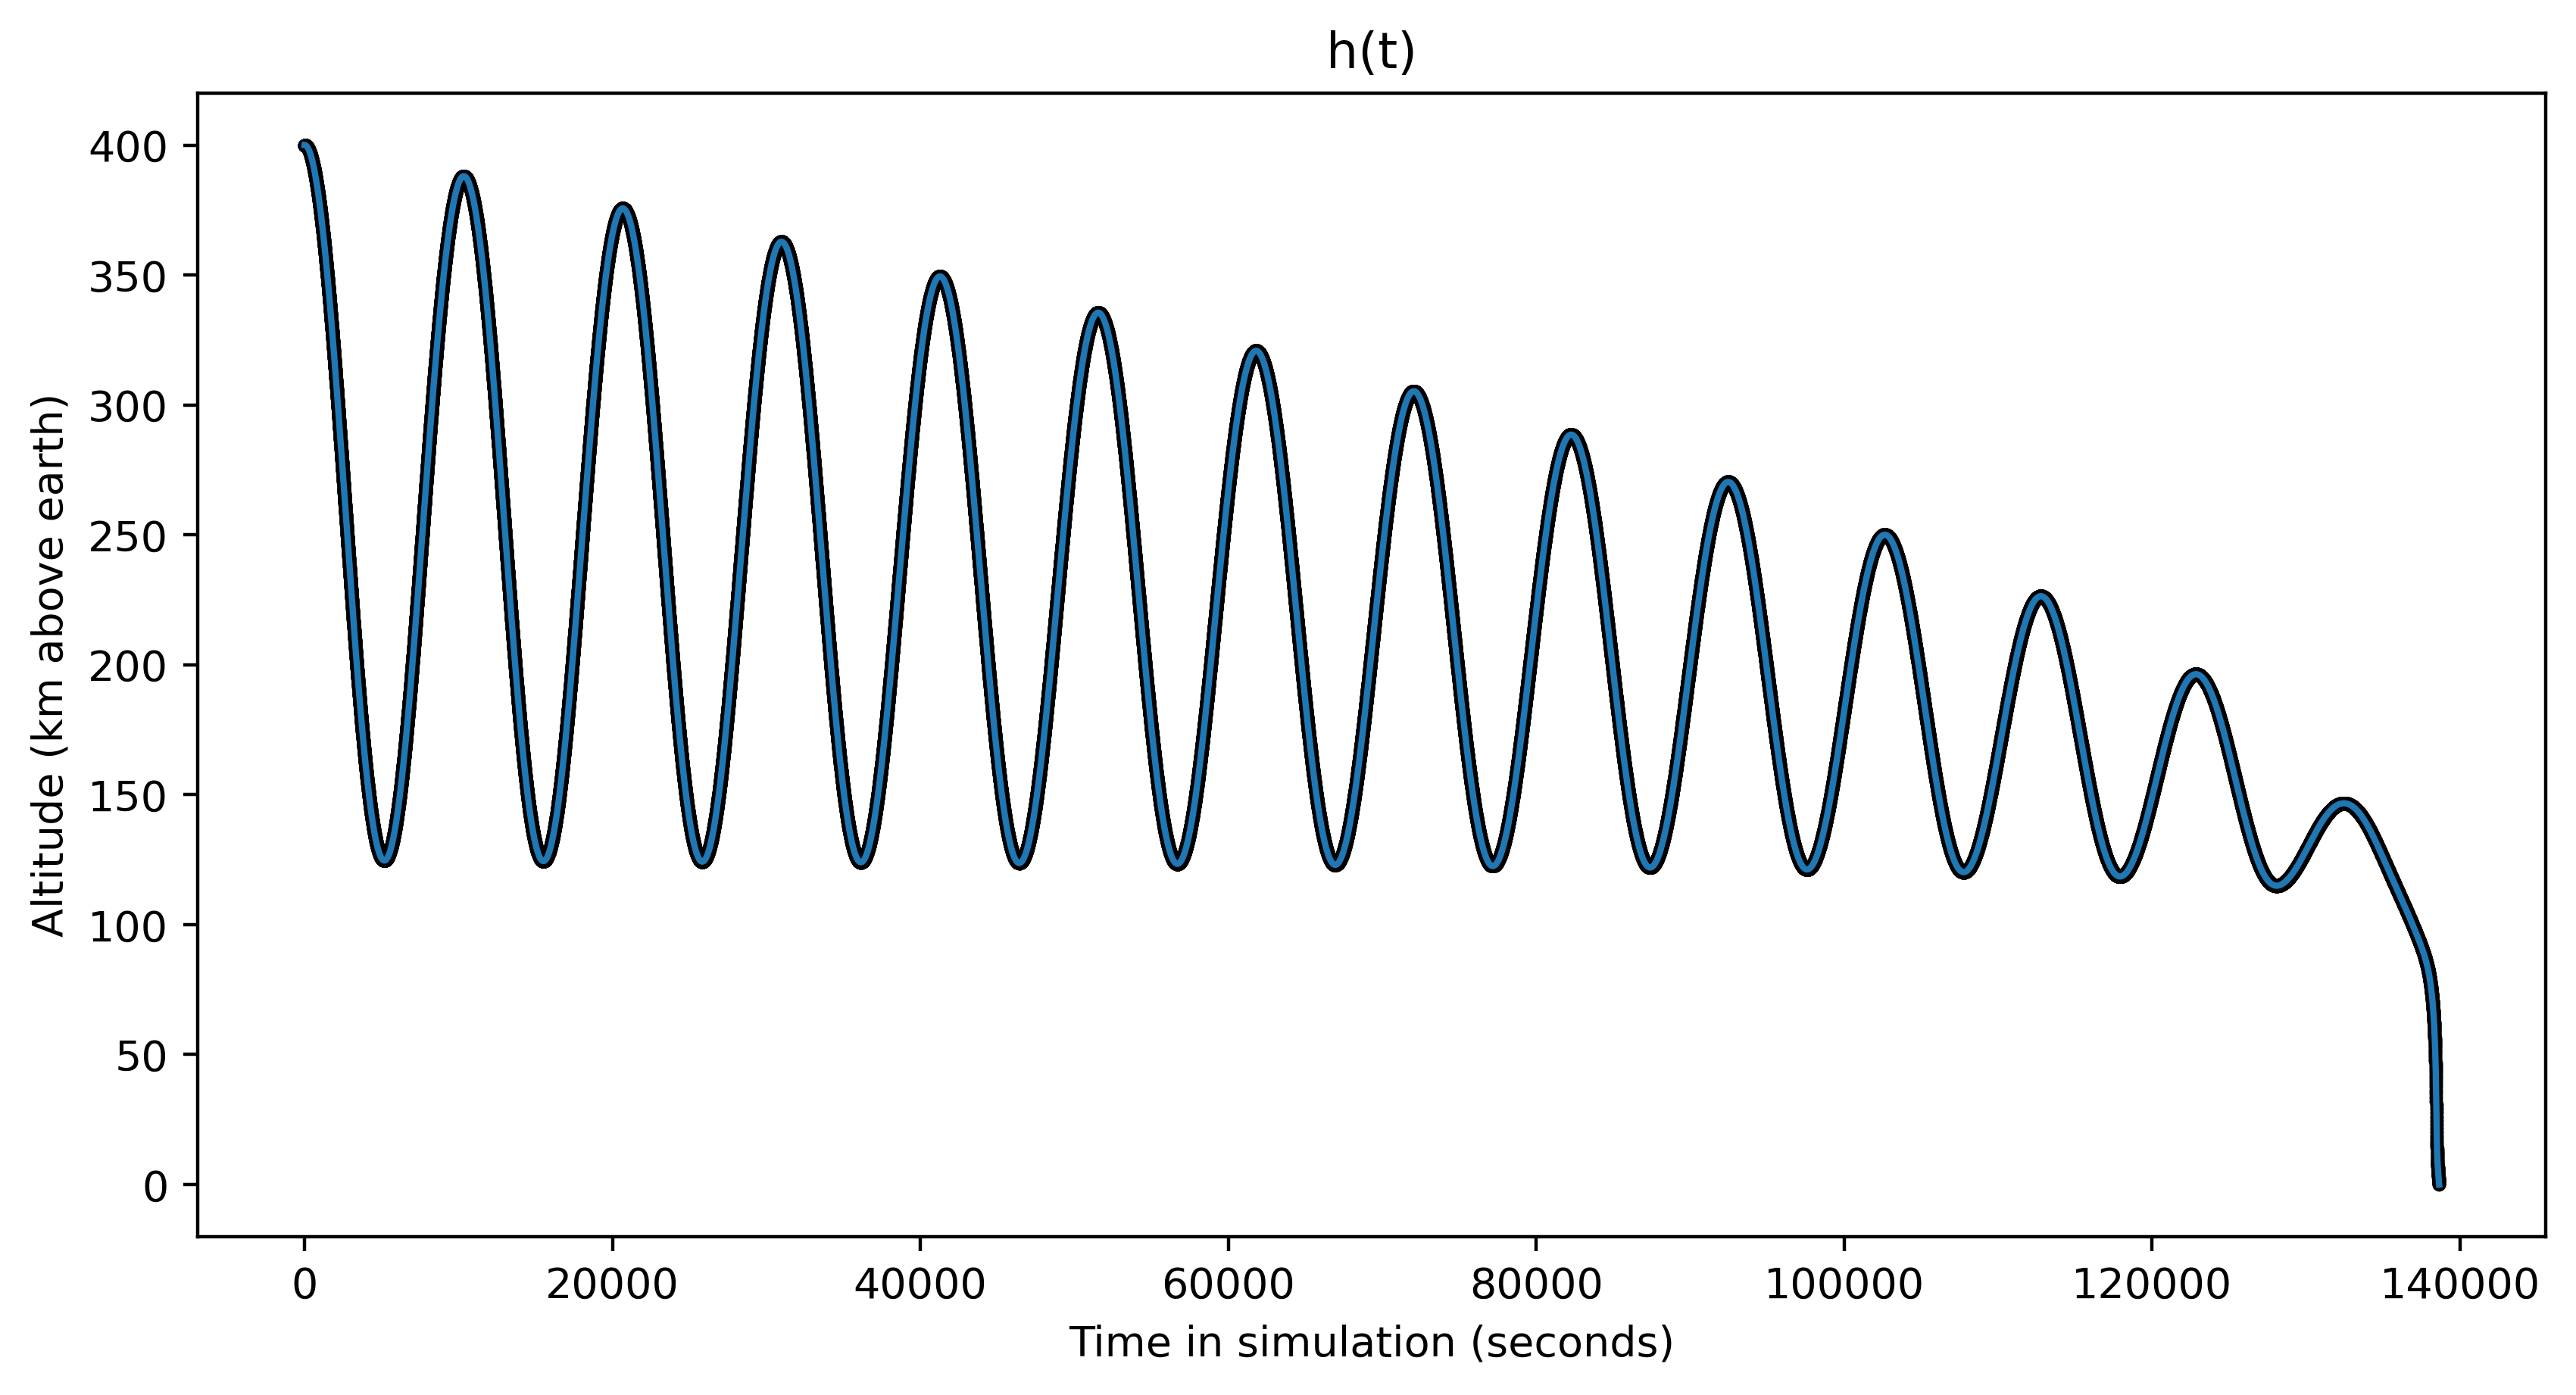

<Figure size 432x288 with 0 Axes>

In [17]:
#Physical Parameters of Setup
GNewton = 6.672e-8
mass = 5.972e27
A = 250*1e4

#Initial Conditions
xstart = 6771e5
ystart = 0
vxstart = 0
vystart = ((GNewton*mass)/xstart)**(1/2) - (80e2)

tstart = 0.0
tend = 25*T
dt = tend/(10000*25)

plt.figure(figsize=(5,5),dpi=200)
x, y, crash_status, distances, angels, vx, vy, altitudes = simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper='leapfrog')

earth  = plt.Circle((0,0), 6371e5, color='green', alpha=0.2)
plt.gcf().gca().add_artist(earth)

if crash_status == False:
    plt.text(-150000000,0,"Earth", color="white", fontsize=20)

plt.text(x[len(x)-1],y[len(y)-1],"ISS (Ending Location)", color="red", fontsize=10)
plt.scatter(x[len(x)-1],y[len(y)-1], color="red", s=70, marker= "v")
plt.scatter(0,0, color="green",marker="s", s=20, label="Earth")

plt.text(6771e5,0,"ISS (Starting Location)", color="blue", fontsize=10)
plt.scatter(6771e5,0, color="blue", s=20)

print("Number of Orbits Completed  = " +str(round(sum(distances)/(2*np.pi*6371e5), 2)))

plt.title("Orbital Simulation of ISS Crossectional Area = " + str(250) + " m^2 \n 10,000 steps per orbit")
plt.legend()
plt.figure()




plt.figure(figsize=(10,5),dpi=400)
plt.plot( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371)
plt.scatter( np.linspace(0, tend, len(altitudes)), (np.asarray(altitudes)/1e5)- 6371, c="black", s=5)


plt.title("h(t)")
plt.ylabel("Altitude (km above earth)")
plt.xlabel("Time in simulation (seconds)")
plt.savefig("plots/step-5-plot4.png")






In [ ]:
72545.77/60/60

In [ ]:
72014.48/60/60 # Final simulation time of crash

**1.**

# Do not run the following cell as a code cell. It is markdown out because it takes a very long time to run. I have already run this and saved the data. To use this data, please continue running the cells after this one. 

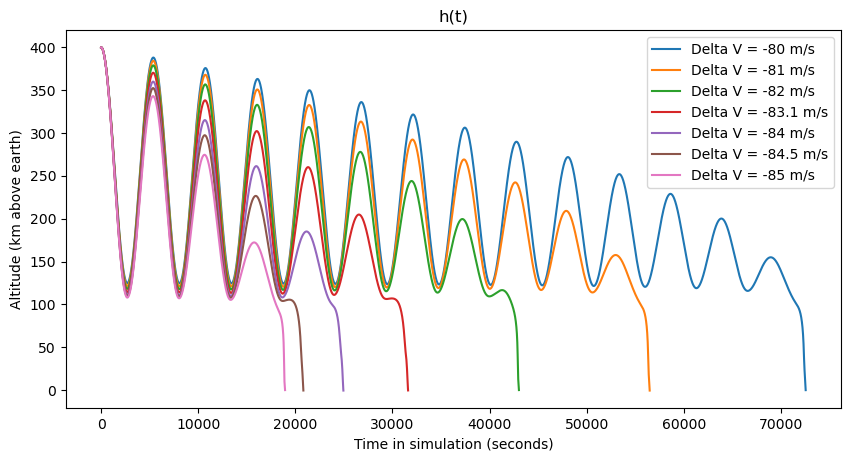

In [15]:
plt.figure(figsize=(10,5),dpi=100)

delta_v = [-(80), - (81), - (82), - (83.1), - (84), - (84.5), - (85)]
for time, alt, dv in zip(np.load("Simulations/time_tracker.npy", allow_pickle=True), np.load("Simulations/altitudes.npy", allow_pickle=True), delta_v):
    plt.plot(time, (np.asarray(alt)/1e5)- 6371, label = "Delta V = " + str(dv) + " m/s")

plt.legend()
plt.title("h(t)")
plt.ylabel("Altitude (km above earth)")
plt.xlabel("Time in simulation (seconds)")
plt.savefig("plots/step-5-plot5.png")



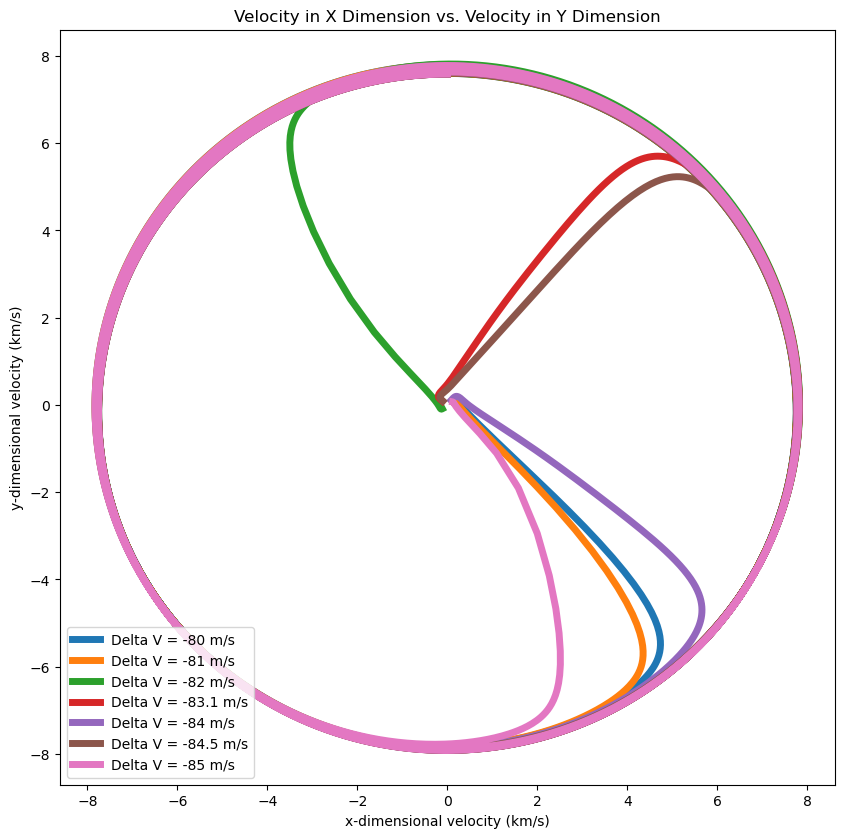

In [16]:
plt.figure(figsize=(10,10),dpi=100)

delta_v = [-(80), - (81), - (82), - (83.1), - (84), - (84.5), - (85)]
for vx, vy, dv in zip(np.load("Simulations/velocities_x.npy", allow_pickle=True), np.load("Simulations/velocities_y.npy", allow_pickle=True), delta_v):
    plt.plot(np.asarray(vx)/1e5, np.asarray(vy)/1e5, label = "Delta V = " + str(dv) + " m/s", linewidth=5)

plt.legend(loc="lower left")
plt.title("Velocity in X Dimension vs. Velocity in Y Dimension")
plt.ylabel("y-dimensional velocity (km/s)")
plt.xlabel("x-dimensional velocity (km/s)")

plt.savefig("plots/step-5-plot6.png")



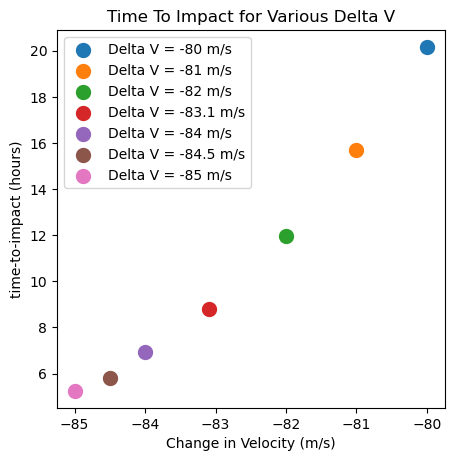

In [17]:
plt.figure(figsize=(5,5),dpi=100)

delta_v = [-(80), - (81), - (82), - (83.1), - (84), - (84.5), - (85)]
for t, dv in zip(np.load("Simulations/t_crash.npy", allow_pickle=True), delta_v):
    plt.scatter(dv,t/60/60, label = "Delta V = " + str(dv) + " m/s", linewidth=5)


plt.legend()
plt.title("Time To Impact for Various Delta V")
plt.ylabel("time-to-impact (hours)")
plt.xlabel("Change in Velocity (m/s)")
plt.savefig("plots/step-5-plot7.png")



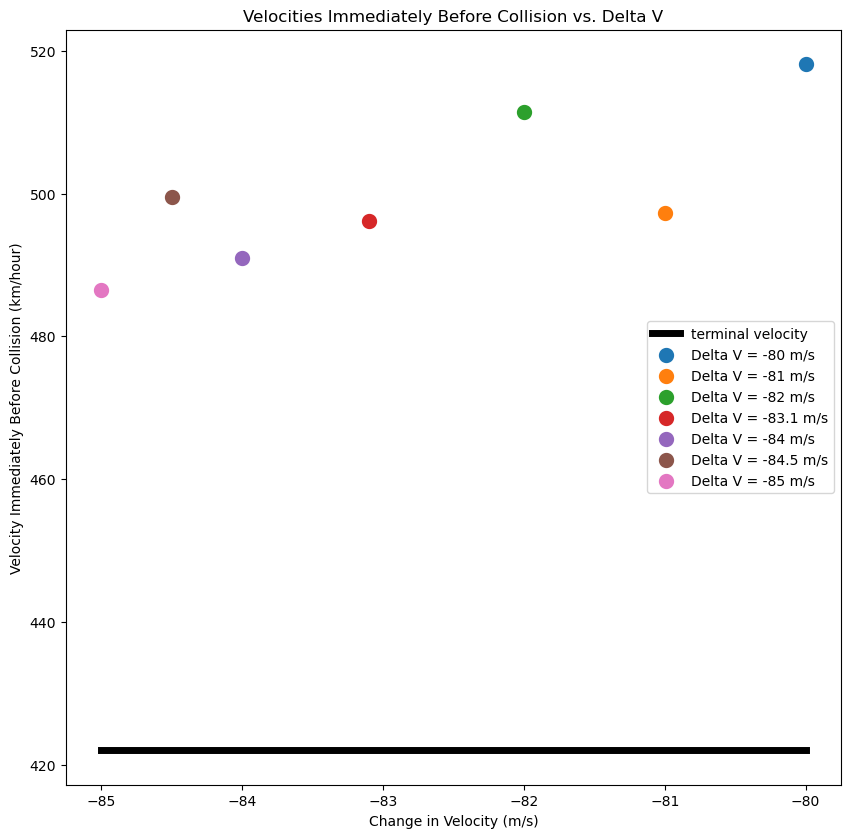

In [18]:
plt.figure(figsize=(10,10),dpi=100)

delta_v = [-(80), - (81), - (82), - (83.1), - (84), - (84.5), - (85)]
for speed, dv in zip(np.load("Simulations/speed_before_collision.npy", allow_pickle=True), delta_v):
    plt.scatter(np.asarray(dv),(np.asarray(speed)/1e5) * (60*60), label = "Delta V = " + str(dv) + " m/s", linewidth=5)

A = 250*1e4

F_d_over_v = (((-1/2)*(2)*(1.2e-3)*A))
Fg = ((-1)*(6.672e-8)*(5.972e27)*(4.20e8))/((6371e5)**2)
terminal_velocity = (((Fg/F_d_over_v)**(1/2))/(1e5)) *(60*60)

plt.plot(delta_v, [terminal_velocity for i in delta_v], c="black",linewidth=5, label="terminal velocity")



plt.legend()
plt.title("Velocities Immediately Before Collision vs. Delta V")
plt.ylabel("Velocity Immediately Before Collision (km/hour)")
plt.xlabel("Change in Velocity (m/s)")

(((Fg/F_d_over_v)**(1/2))/(1e5)) *(60*60)
plt.savefig("plots/step-5-plot8.png")



**2.**

Having looked at this question beforehand, I made sure to include delta v = 83.1 m/s as one of my 7 simulations. 

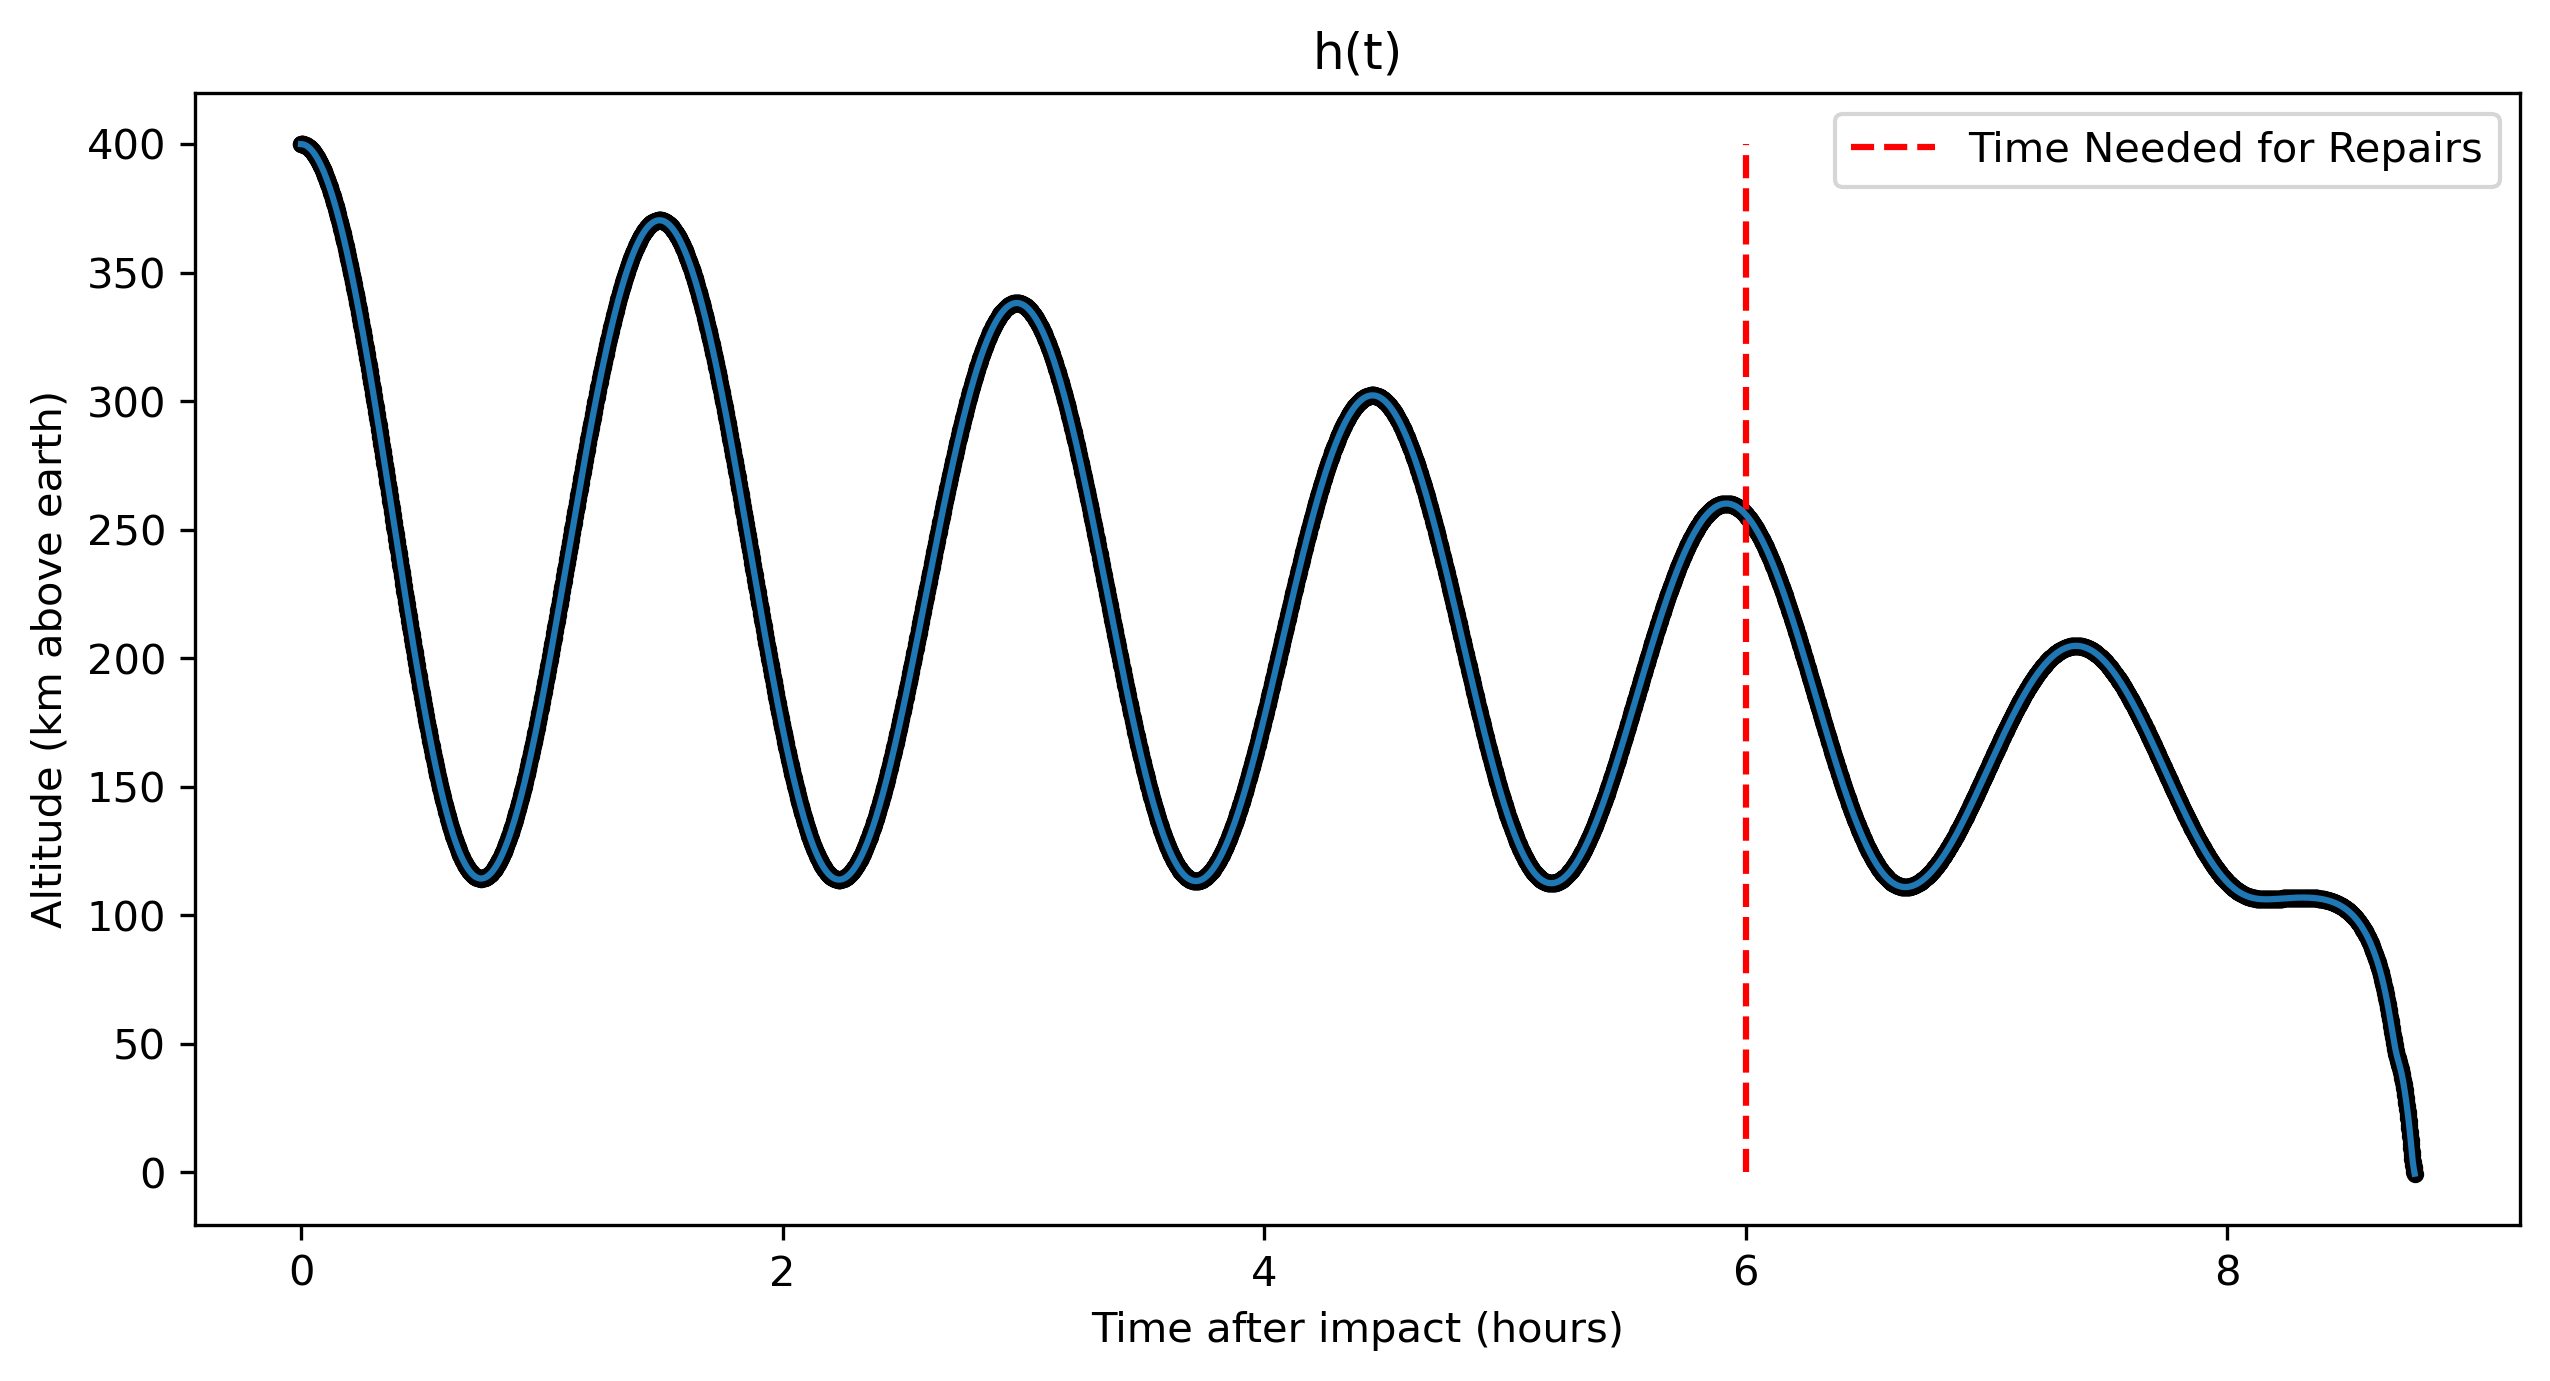

In [19]:
plt.figure(figsize=(10,5),dpi=300)

altitudes = np.load("Simulations/altitudes.npy", allow_pickle=True)[3]
time  = np.load("Simulations/time_tracker.npy", allow_pickle=True)[3]

plt.plot( time/60/60, (np.asarray(altitudes)/1e5)- 6371)
plt.scatter( time/60/60, (np.asarray(altitudes)/1e5)- 6371, c="black", s=10)

plt.vlines(6,0,400,colors='red', linestyles='--', label="Time Needed for Repairs")

plt.legend()
plt.title("h(t)")
plt.ylabel("Altitude (km above earth)")
plt.xlabel("Time after impact (hours)")
plt.savefig("plots/step-5-plot9.png")

Yes, the astronuats can certianly make the necessary repars to the stabilization thrusters. The 6 hours that are needed will be avaliable because that leaves  another 2 hours for the astronauts before the space station crashes.

In [20]:
hours = time/60/60
indx = np.arange(len(hours))
altitude_at_6H = ((np.asarray(altitudes)[min(np.abs(hours - 6)) == np.abs(hours - 6)][0])/1e5) - 6371
print("ISS will have an altitude of " + str(round(altitude_at_6H, 2)) + " km above earth at 6 hours after impact.")

ISS will have an altitude of 255.94 km above earth at 6 hours after impact.


**3.**

Crash at 31606.02 seconds
Maximum absolute velocity achieved: 7.91856 km/s
Speed before impact: 0.14 km/s

Number of Orbits Completed  = 6.1


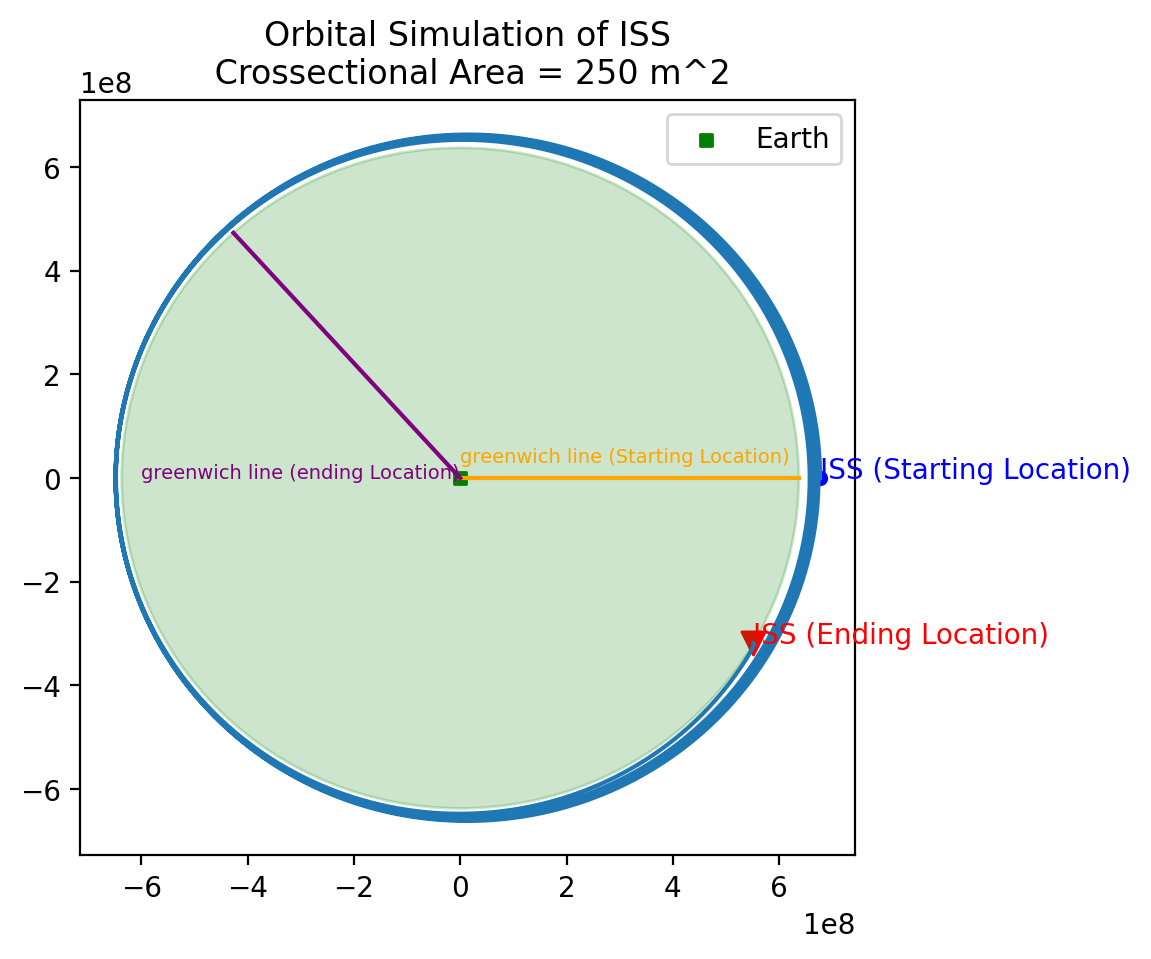

In [24]:
#Physical Parameters of Setup
GNewton = 6.672e-8
mass = 5.972e27
A = 250*1e4





def acc(x, y, old_vx, old_vy):
    rad2 = x**2 + y**2
    a = (- GNewton * mass / rad2)
    
    theta = np.arctan(np.abs(y / x))
    ax = a * np.cos(theta) * np.sign(x)
    ay = a * np.sin(theta) * np.sign(y)
    
    dist_earth = ((x**2) + (y**2))**(1/2)
    
    ax = ax + (((-1/2)*(2)*get_p_ATM((dist_earth/1e5) - 6371)*(old_vx**2)*A*(np.sign(old_vx)))/(4.20e8))
    ay = ay + (((-1/2)*(2)*get_p_ATM((dist_earth/1e5) - 6371)*(old_vy**2)*A*(np.sign(old_vy)))/(4.20e8))

    
    return ax, ay 

def leapfrog_step(dt, x, y, vx, vy):
    ax, ay = acc(x,y, vx, vy)
    
    new_vx_half = vx + ax * dt * 0.5
    new_vy_half = vy + ay * dt * 0.5
    
    new_x = x + new_vx_half * dt
    new_y = y + new_vy_half * dt
    
    ax, ay = acc(new_x, new_y, vx, vy)
    new_vx = new_vx_half + ax*dt*0.5
    new_vy = new_vy_half + ay*dt*0.5
    
    return new_x, new_y, new_vx, new_vy


def simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper = 'euler'):
    #Compute number of sim. steps necessary such that: dt * Nsteps > tend
    Nsteps = int((tend - tstart) / dt ) + 1

    #Define variables for step n.
    #These will be used to define step n+1.
    old_x = xstart
    old_y = ystart
    old_vx = vxstart
    old_vy = vystart
    old_t = tstart 

    #Record of values
    t = [old_t]
    x = [old_x]
    y = [old_y]
    vx = [old_vx]
    vy = [old_vy]
    distances = []
    angels = [0]
    altitudes = [6771e5]
    
    for i in tqdm(range(Nsteps)):
        new_t = old_t + dt
        

        new_x, new_y, new_vx, new_vy = leapfrog_step(dt, old_x, old_y, old_vx, old_vy)
       


        #save
        t.append(new_t)
        x.append(new_x)
        y.append(new_y)
        vx.append(new_vx)
        vy.append(new_vy)
        altitudes.append(((new_x**2) + (new_y**2))**(1/2))

        distances.append(((((new_y-old_y)**2) + ((new_x- old_x)**2)) ** (1/2)))

        angels.append(((sum(distances) % (2*np.pi*6371e5))/(2*np.pi*6371e5)) * (np.pi*2))
        # "new" is now the input for the next loop iteration
        old_t = new_t
        old_x = new_x
        old_y = new_y
        old_vx = new_vx
        old_vy = new_vy
        
        if (( (new_x**2) + (new_y**2) ) ** (1/2)) < 6371e5:
            print("Crash at " + str(round(new_t, 2)) +" seconds") 
            vx = np.asarray(vx)
            vy = np.asarray(vy)
            v = ((vx**2) + (vy**2))**(1/2)
            print("Maximum absolute velocity achieved: " + str(round((max(max(v), min(v), key=abs)/1e5), 5)) +" km/s")
            print("Speed before impact: " + str(round(v[len(v)-1]/1e5,2)) +" km/s")
            plt.plot(x,y)
            Crashed=True
            return x, y, Crashed, distances, angels, vx, vy, altitudes, new_t
        
        
    #Simulation is done. Plot evolution of spring position
    plt.plot(x,y)
    #plt.scatter(t, y, c = 'k', s = 5)

    #Phase portrait: pos vs. velocity
    #plt.plot(y, v)
    Crashed=False
    return x, y, Crashed, distances, angels, vx, vy, altitudes, new_t
    
    
#Initial Conditions
xstart = 6771e5
ystart = 0
vxstart = 0
vystart = ((GNewton*mass)/xstart)**(1/2) - (83.1e2)

tstart = 0.0
tend = 25*T
dt = tend/(1000*25)

plt.figure(figsize=(5,5),dpi=200)
x, y, crash_status, distances, angels, vx, vy, altitudes, crash_t = simulate(xstart, ystart, vxstart, vystart, tstart, tend, dt, stepper='leapfrog')

earth  = plt.Circle((0,0), 6371e5, color='green', alpha=0.2)
plt.gcf().gca().add_artist(earth)

if crash_status == False:
    plt.text(-150000000,0,"Earth", color="white", fontsize=20)

plt.text(x[len(x)-1],y[len(y)-1],"ISS (Ending Location)", color="red", fontsize=10)
plt.scatter(x[len(x)-1],y[len(y)-1], color="red", s=70, marker= "v")
plt.scatter(0,0, color="green",marker="s", s=20, label="Earth")


plt.text(6771e5,0,"ISS (Starting Location)", color="blue", fontsize=10)
plt.scatter(6771e5,0, color="blue", s=20)

print("Number of Orbits Completed  = " +str(round(sum(distances)/(2*np.pi*6371e5), 2)))

plt.title("Orbital Simulation of ISS\n Crossectional Area = " + str(250) + " m^2")
#plt.xlim(4000e5,6000e5)
#plt.ylim(-2000e5,-4000e5)

plt.plot([0, 6371e5], [0,0], color="orange")
plt.text(0,300e5,"greenwich line (Starting Location)", color="orange", fontsize=7)

rad_end = 7.2921150e-5 * (crash_t)

grreen_loc = np.array([np.cos(rad_end), np.sin(rad_end)])
grreen_loc = grreen_loc *  6371e5

plt.plot([0, grreen_loc[0]], [0,grreen_loc[1]], color="purple")
plt.text(-6000e5,0,"greenwich line (ending Location)", color="purple", fontsize=7)




plt.legend()
plt.savefig("plots/step-5-plot10.png")



After ~ 8.8 hours of freefall, the ISS will land approximately opposite the greenwich line, which is called the international date line. I simulated both the rotation of the earth (7.2921150e-5 radias/second) and the known fall characteristics of the ISS. Below you will se a view of the approximate region I believe that the ISS will land inside.

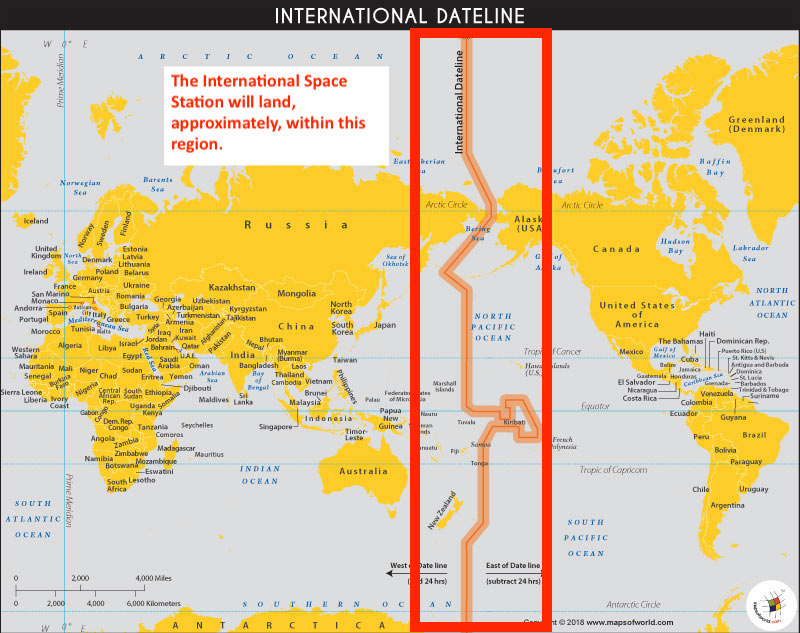

In [22]:
from IPython.display import Image
Image(filename='map-international-date-line.jpg') 